#Preparação


In [ ]:
rm ~/.kaggle/kaggle.json

In [ ]:
rmdir ~/.kaggle

In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import requests
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import os
import shutil
from sklearn.utils import resample
from plotly.offline import plot, iplot
from google.colab import files
import cufflinks as cf 
cf.go_offline()
py.offline.init_notebook_mode(connected = True)
import plotly.io as pio
pio.renderers
pio.renderers.default = 'colab'

In [ ]:
!mkdir ~/.kaggle

api_token = {"username":"username","key":"api-key"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

##Pegando os data sets de 2013





In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content/sample_data'

In [ ]:
!kaggle datasets download -d arturbritosouza/fies-para-a-pesquisa

100% 1.72G/1.72G [00:18<00:00, 60.0MB/s]
100% 1.72G/1.72G [00:18<00:00, 98.7MB/s]


In [ ]:
!unzip -j "/content/fies-para-a-pesquisa.zip" "FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2013.csv" 
!unzip -j "/content/fies-para-a-pesquisa.zip" "FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2013.csv" 

Archive:  /content/fies-para-a-pesquisa.zip
  inflating: FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2013.csv  
Archive:  /content/fies-para-a-pesquisa.zip
  inflating: FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2013.csv  


#Colocando em datasets para analisar


In [ ]:
fields = [
'SG_UF', 'ST_DEFICIENCIA', 'DS_RACA_COR', 'ST_ENSINO_MEDIO_ESCOLA_PUBLICA', 'DS_TIPO_CURSO', 'DS_CURSO', 'DS_SEXO', 'NO_IES',
'NO_MUNICIPIO', 'NO_AGENTE_FINANCEIRO', 'DS_ESTADO_CIVIL', 'DS_PERIODICIDADE_CUR', 'NU_ANO_PROC', 'NU_MES_PROC' , 'NU_SEMESTRE',
'NU_MES',  'NU_ANO', 'TP_FIANCA', 'VL_REPASSE', 'CO_CONTRATO_FIES', 'VL_PERC_FINANCIAMENTO', 'QT_SEMESTRE_FINANCIADO', 'DT_NASCIMENTO',
'CO_PROCESSO', 'NU_ANO_EXERCICIO_INSC', 'NU_PERCENTUAL_PROUNI', 'NU_PERCENT_SOLICITADO_FINANC', 'VL_MENSALIDADE'
]

In [ ]:
df3 = pd.read_csv('FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2013.csv', encoding="ISO-8859-1", sep = ';', usecols=fields)
df12 = pd.read_csv('FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2013.csv', encoding="ISO-8859-1", sep = ';', usecols=fields)

In [ ]:
pd.set_option('display.max_columns', 50)
df3

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,TP_FIANCA,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_REPASSE,DT_NASCIMENTO,ST_DEFICIENCIA,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,DS_SEXO,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,81,159462,Caixa Econômica Federal,3,1,2013,"588,03",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,4
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,81,159462,Caixa Econômica Federal,2,1,2013,"588,03",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,4
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,81,159462,Caixa Econômica Federal,1,1,2013,"588,03",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,4
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,82,159462,Caixa Econômica Federal,4,1,2013,"588,03",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,5
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,83,159462,Caixa Econômica Federal,5,1,2013,"588,03",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890608,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,82,1068473,Caixa Econômica Federal,3,1,2013,"753,33",N,2013.0,0.0,100.0,"13615,65",28/02/1986 00:00:00,N,S,Feminino,Casado,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,5
4890609,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,82,1068473,Caixa Econômica Federal,4,1,2013,"753,33",N,2013.0,0.0,100.0,"13615,65",28/02/1986 00:00:00,N,S,Feminino,Casado,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,5
4890610,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,82,1068473,Caixa Econômica Federal,1,1,2013,"753,33",N,2013.0,0.0,100.0,"13615,65",28/02/1986 00:00:00,N,S,Feminino,Casado,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,5
4890611,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,83,1068473,Caixa Econômica Federal,5,1,2013,"753,33",N,2013.0,0.0,100.0,"13615,65",28/02/1986 00:00:00,N,S,Feminino,Casado,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,6


In [ ]:
pd.set_option('display.max_columns', 50)
df12

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,TP_FIANCA,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_REPASSE,DT_NASCIMENTO,ST_DEFICIENCIA,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,DS_SEXO,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,86,159462,Caixa Econômica Federal,7,2,2013,"588,03",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,9
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,86,159462,Caixa Econômica Federal,8,2,2013,"588,03",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,9
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,87,159462,Caixa Econômica Federal,9,2,2013,"588,03",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,10
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,88,159462,Caixa Econômica Federal,10,2,2013,"588,03",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,11
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,91,159462,Caixa Econômica Federal,11,2,2013,"588,03",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888783,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,87,1247654,Caixa Econômica Federal,8,2,2013,"2685,29",N,2009.0,0.0,75.0,"198713,23",9/04/1980 00:00:00,N,N,Masculino,Casado,Pardo,75.0,13.0,MEDICINA,Bacharelado,Semestral,2013,10
5888784,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,87,1247654,Caixa Econômica Federal,9,2,2013,"2685,29",N,2009.0,0.0,75.0,"198713,23",9/04/1980 00:00:00,N,N,Masculino,Casado,Pardo,75.0,13.0,MEDICINA,Bacharelado,Semestral,2013,10
5888785,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,88,1247654,Caixa Econômica Federal,10,2,2013,"2685,29",N,2009.0,0.0,75.0,"198713,23",9/04/1980 00:00:00,N,N,Masculino,Casado,Pardo,75.0,13.0,MEDICINA,Bacharelado,Semestral,2013,11
5888786,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,91,1247654,Caixa Econômica Federal,11,2,2013,"2685,29",N,2009.0,0.0,75.0,"198713,23",9/04/1980 00:00:00,N,N,Masculino,Casado,Pardo,75.0,13.0,MEDICINA,Bacharelado,Semestral,2013,12


In [ ]:
pd.reset_option("^display")

#Tratamento inicial.

###Crindo uma palheta de cores.

In [ ]:
cores = ['#009739', '#FEDD00', '#012169', '#FFFFFF', '#fe9e00', '#e0fe00', '#00fedd', '#0021fe', '#5e00fe', 
         '#dd00fe',  '#131000', '#898675', '#ffd4de', '#fed78d', '#867589', '#fe0021', '#00a0fe', '#3333ff',
         '#336600', '#660033', '#003a32', '#fe0060', '#260005', '#666699', '#66ff99', '#99ffcc', '#ccff99' ]

##Com os dados de 2011.1

###Retirando as repetições

In [ ]:
repeticoes = df3['CO_CONTRATO_FIES'].value_counts()
def custom_rating(contrato):
        return repeticoes[contrato]
        
df3['MESES_CONSEDIDOS'] = df3.apply(lambda x: custom_rating(x['CO_CONTRATO_FIES']),axis=1)

df3

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,81,159462,Caixa Econômica Federal,3,1,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,4,6
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,81,159462,Caixa Econômica Federal,2,1,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,4,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,81,159462,Caixa Econômica Federal,1,1,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,4,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,82,159462,Caixa Econômica Federal,4,1,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,5,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,83,159462,Caixa Econômica Federal,5,1,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890608,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,82,1068473,Caixa Econômica Federal,3,1,2013,"753,33",...,Casado,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,5,6
4890609,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,82,1068473,Caixa Econômica Federal,4,1,2013,"753,33",...,Casado,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,5,6
4890610,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,82,1068473,Caixa Econômica Federal,1,1,2013,"753,33",...,Casado,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,5,6
4890611,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,83,1068473,Caixa Econômica Federal,5,1,2013,"753,33",...,Casado,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,6,6


In [ ]:
df3DuplicateRows = df3[df3.duplicated(subset='CO_CONTRATO_FIES')]
df3DuplicateRows

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,81,159462,Caixa Econômica Federal,2,1,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,4,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,81,159462,Caixa Econômica Federal,1,1,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,4,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,82,159462,Caixa Econômica Federal,4,1,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,5,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,83,159462,Caixa Econômica Federal,5,1,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,6,6
5,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,84,159462,Caixa Econômica Federal,6,1,2013,"588,06",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890608,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,82,1068473,Caixa Econômica Federal,3,1,2013,"753,33",...,Casado,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,5,6
4890609,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,82,1068473,Caixa Econômica Federal,4,1,2013,"753,33",...,Casado,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,5,6
4890610,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,82,1068473,Caixa Econômica Federal,1,1,2013,"753,33",...,Casado,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,5,6
4890611,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,83,1068473,Caixa Econômica Federal,5,1,2013,"753,33",...,Casado,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,6,6


In [ ]:
df3ComLinhasDuplicads = df3
df3 = df3.drop_duplicates(subset='CO_CONTRATO_FIES')

In [ ]:
df3

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,81,159462,Caixa Econômica Federal,3,1,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,4,6
6,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,81,967916,Caixa Econômica Federal,3,1,2013,"849,59",...,Solteiro,Pardo,100.0,2.0,DIREITO,Bacharelado,Anual,2013,4,6
12,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,81,153701,Caixa Econômica Federal,1,1,2013,"552,23",...,Solteiro,Branco,65.0,7.0,DIREITO,Bacharelado,Anual,2013,4,6
18,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,81,188322,Caixa Econômica Federal,3,1,2013,"424,79",...,Solteiro,Pardo,50.0,7.0,DIREITO,Bacharelado,Anual,2013,4,6
24,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,81,157018,Caixa Econômica Federal,3,1,2013,"784,55",...,Solteiro,Branco,100.0,9.0,DIREITO,Bacharelado,Anual,2013,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890583,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,81,974878,Caixa Econômica Federal,1,1,2013,"753,33",...,Solteiro,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,4,6
4890589,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,81,966730,Caixa Econômica Federal,2,1,2013,"753,33",...,Solteiro,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,4,6
4890595,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,81,963170,Caixa Econômica Federal,1,1,2013,"753,33",...,Solteiro,Branco,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,4,6
4890601,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,81,991450,Caixa Econômica Federal,2,1,2013,"753,33",...,Solteiro,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,4,6


In [ ]:
df3ComLinhasDuplicads['CO_CONTRATO_FIES'].value_counts()

116690    36
830652    36
932045    36
133127    36
139058    36
          ..
820793     1
680491     1
845386     1
848498     1
842599     1
Name: CO_CONTRATO_FIES, Length: 788016, dtype: int64

###Retirando as linhas que possuem valores nulos

In [ ]:
df3.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,788016.000000,7.880160e+05,788016.000000,788016.000000,788016.000000,788011.000000,788011.000000,788011.000000,788011.000000,788011.000000,788016.0,788016.000000,788016.000000
mean,80.848597,7.114604e+05,2.253043,1.040077,2012.951246,2012.172126,1.378598,91.609999,91.609999,8.003829,2013.0,3.848597,6.206236
std,1.325307,2.889540e+05,1.902292,0.196139,0.232393,0.851527,8.186375,16.438438,16.438438,2.163722,0.0,1.325307,1.336670
min,79.000000,1.111870e+05,1.000000,1.000000,2007.000000,2007.000000,0.000000,50.000000,50.000000,1.000000,2013.0,2.000000,1.000000
25%,80.000000,4.759218e+05,1.000000,1.000000,2013.000000,2012.000000,0.000000,100.000000,100.000000,7.000000,2013.0,3.000000,6.000000
50%,81.000000,7.382515e+05,2.000000,1.000000,2013.000000,2012.000000,0.000000,100.000000,100.000000,8.000000,2013.0,4.000000,6.000000
75%,82.000000,9.606602e+05,3.000000,1.000000,2013.000000,2013.000000,0.000000,100.000000,100.000000,10.000000,2013.0,5.000000,6.000000
max,84.000000,1.159775e+06,12.000000,2.000000,2013.000000,2013.000000,50.000000,100.000000,100.000000,20.000000,2013.0,7.000000,36.000000


In [ ]:
df3.isnull().sum().sort_values(ascending=False)

DS_ESTADO_CIVIL                   1258
DS_SEXO                           1245
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    1245
ST_DEFICIENCIA                    1245
DT_NASCIMENTO                     1245
DS_RACA_COR                       1245
DS_PERIODICIDADE_CUR                 7
DS_TIPO_CURSO                        7
DS_CURSO                             7
NU_PERCENTUAL_PROUNI                 5
NU_PERCENT_SOLICITADO_FINANC         5
VL_REPASSE                           5
NU_ANO_EXERCICIO_INSC                5
TP_FIANCA                            5
QT_SEMESTRE_FINANCIADO               5
NO_IES                               5
VL_PERC_FINANCIAMENTO                5
NU_ANO_PROC                          0
NU_MES_PROC                          0
SG_UF                                0
NO_MUNICIPIO                         0
VL_MENSALIDADE                       0
NU_ANO                               0
NU_SEMESTRE                          0
NU_MES                               0
NO_AGENTE_FINANCEIRO     

In [ ]:
df3.dropna(axis=0, inplace=True)

In [ ]:
df3.isnull().sum().sort_values(ascending=False)

SG_UF                             0
DT_NASCIMENTO                     0
NU_MES_PROC                       0
NU_ANO_PROC                       0
DS_PERIODICIDADE_CUR              0
DS_TIPO_CURSO                     0
DS_CURSO                          0
QT_SEMESTRE_FINANCIADO            0
VL_PERC_FINANCIAMENTO             0
DS_RACA_COR                       0
DS_ESTADO_CIVIL                   0
DS_SEXO                           0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    0
ST_DEFICIENCIA                    0
VL_REPASSE                        0
NO_MUNICIPIO                      0
NU_PERCENT_SOLICITADO_FINANC      0
NU_PERCENTUAL_PROUNI              0
NU_ANO_EXERCICIO_INSC             0
TP_FIANCA                         0
VL_MENSALIDADE                    0
NU_ANO                            0
NU_SEMESTRE                       0
NU_MES                            0
NO_AGENTE_FINANCEIRO              0
CO_CONTRATO_FIES                  0
CO_PROCESSO                       0
NO_IES                      

In [ ]:
df3.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,786756.000000,7.867560e+05,786756.000000,786756.000000,786756.000000,786756.000000,786756.000000,786756.000000,786756.000000,786756.000000,786756.0,786756.000000,786756.000000
mean,80.848624,7.111443e+05,2.253448,1.040123,2012.951196,2012.171167,1.379653,91.604649,91.604649,8.000939,2013.0,3.848624,6.206490
std,1.325315,2.889966e+05,1.902988,0.196248,0.232429,0.851664,8.189418,16.442559,16.442559,2.163874,0.0,1.325315,1.337442
min,79.000000,1.111870e+05,1.000000,1.000000,2007.000000,2007.000000,0.000000,50.000000,50.000000,1.000000,2013.0,2.000000,1.000000
25%,80.000000,4.755668e+05,1.000000,1.000000,2013.000000,2012.000000,0.000000,100.000000,100.000000,7.000000,2013.0,3.000000,6.000000
50%,81.000000,7.377685e+05,2.000000,1.000000,2013.000000,2012.000000,0.000000,100.000000,100.000000,8.000000,2013.0,4.000000,6.000000
75%,82.000000,9.604642e+05,3.000000,1.000000,2013.000000,2013.000000,0.000000,100.000000,100.000000,10.000000,2013.0,5.000000,6.000000
max,84.000000,1.159775e+06,12.000000,2.000000,2013.000000,2013.000000,50.000000,100.000000,100.000000,20.000000,2013.0,7.000000,36.000000


###Criando a coluna de região, baseado nos estados.

In [ ]:
df3['REGIAO'] = df3['SG_UF']

In [ ]:
df3['REGIAO']= df3['REGIAO'].replace(['AM','RR', 'AP', 'PA', 'TO', 'RO', 'AC'], 'NORTE')
df3['REGIAO']= df3['REGIAO'].replace(['MA','PI', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'BA'], 'NORDESTE')
df3['REGIAO']= df3['REGIAO'].replace(['MT','MS', 'GO', 'DF'], 'CENTRO-OESTE')
df3['REGIAO']= df3['REGIAO'].replace(['SP','RJ', 'ES', 'MG'], 'SUDESTE')
df3['REGIAO']= df3['REGIAO'].replace(['PR','RS', 'SC'], 'SUL')

###Criando a coluna categoria de ciencia do curso, para separar os cursos em 8 categorias definidas pela capes

In [ ]:
df3['CATEGORIA_CIENCIA_CURSO'] = df3['DS_CURSO']

In [ ]:
df3['CATEGORIA_CIENCIA_CURSO']= df3['CATEGORIA_CIENCIA_CURSO'].replace(['DIREITO','ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS', 'ARQUITETURA E URBANISMO',
'DESIGN GRÁFICO', 'SERVIÇO SOCIAL', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA', 'JORNALISMO', 'GESTÃO DE RECURSOS HUMANOS','COMÉRCIO INTERNACIONAL', 
'RELAÇÕES INTERNACIONAIS','GASTRONOMIA', 'COMUNICAÇÃO SOCIAL', 'CIÊNCIAS ECONÔMICAS', 'PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO SOCIAL - JORNALISMO', 
'DESIGN DE INTERIORES', 'EVENTOS', 'MARKETING', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO', 'TURISMO', 'GESTÃO FINANCEIRA', 'RELAÇÕES PÚBLICAS', 
'BIBLIOTECONOMIA', 'GESTÃO COMERCIAL', 'COMÉRCIO EXTERIOR', 'PROCESSOS GERENCIAIS', 'SEGURANÇA NO TRABALHO', 'GESTÃO DA PRODUÇÃO INDUSTRIAL', 
'TERAPIA OCUPACIONAL', 'HOTELARIA', 'COMUNICAÇÃO SOCIAL - RELAÇÕES PÚBLICAS', 'SECRETARIADO EXECUTIVO', 'DESIGN DE PRODUTO', 'DESENHO INDUSTRIAL', 
'CIÊNCIAS SOCIAIS', 'GESTÃO DA QUALIDADE', 'NEGÓCIOS INTERNACIONAIS', 'COMUNICAÇÃO SOCIAL -RADIALISMO - PRODUÇÃO EM MÍDIA AUDIOVISUAL', 
'PROPAGANDA E MARKETING', 'GESTÃO DE SEGURANÇA PRIVADA', 'GESTÃO HOSPITALAR', 'GESTÃO PÚBLICA', 'GESTÃO PORTUÁRIA', 'SECRETARIADO', 
'SECRETARIADO EXECUTIVO TRILÍNGUE', 'ADMINISTRAÇÃO DE EMPRESAS', 'RÁDIO, TV E INTERNET', 'GESTÃO DE MICRO E PEQUENAS EMPRESAS', 'TURISMO E HOTELARIA',
'DESENHO INDUSTRIAL - DESIGN DIGITAL', 'PRODUÇÃO PUBLICITÁRIA', 'GESTÃO FINANCEIRA E CONTROLADORIA EMPRESARIAL', 'NEGÓCIOS DA MODA', 
'TELEMÁTICA', 'NEGÓCIOS IMOBILIÁRIOS', 'SECRETARIADO EXECUTIVO BILÍNGUE', 'MARKETING E PROPAGANDA', 'COMUNICAÇÃO E MULTIMEIOS', ''
'CIÊNCIA POLÍTICA', 'SEGURANÇA PÚBLICA', 'ADMINISTRAÇÃO PÚBLICA', 'GESTÃO DE VAREJO', 'GESTÃO DE PESSOAS', 'DESENHO INDUSTRIAL - PROJETO DO PRODUTO',
'DESENHO INDUSTRIAL - PROGRAMAÇÃO VISUAL', 'CIÊNCIA ECONÔMICA', 'COMUNICAÇÃO ASSISTIVA', 'SEGURANÇA DO TRABALHO', 'DESENHO INDUSTRIAL - DESIGN DE MODA',
'ESTUDOS SOCIAIS', 'ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS', 'PSICOPEDAGOGIA CLÍNICA E INSTITUCIONAL', 'GESTÃO DE PRODUÇÃO INDUSTRIAL',
'GESTÃO EMPRESARIAL E CONTROLADORIA', 'GESTÃO DE TURISMO', 'CIÊNCIAS POLÍTICAS', 'TURISMO E LAZER', 'GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 
'GESTÃO DA QUALIDADE E SEGURANÇA DO TRABALHO', 'GESTÃO DE QUALIDADE EM METROLOGIA', 'LOGÍSTICA', 'SECRETARIADO EXECUTIVO - BILÍNGUE', 'GESTÃO DO AGRONEGÓCIO',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO E MARKETING', 'SEGURANÇA PRIVADA', 'GESTÃO DE TELECOMUNICAÇÕES',
'SERVIÇOS PENAIS', 'NORMAL  SUPERIOR', 'GESTÃO DE SERVIÇOS JUDICIÁRIOS E NOTARIAIS', 'SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÊS/INGLÊS',
'GESTÃO DE SEGUROS', 'ECONOMIA', 'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS', 'GESTÃO DE COOPERATIVAS', 'COMÉRCIO EXTERIOR E NEGÓCIOS INTERNACIONAIS',
'GESTÃO EXECUTIVA DE NEGÓCIOS', 'HOTELARIA HOSPITALAR', 'GESTÃO DE SISTEMAS DE INFORMAÇÃO', 'PLANEJAMENTO LOGÍSTICO DE CARGAS', 'GESTÃO DE AGRONEGÓCIOS',
'GESTÃO DE TERMINAIS E OPERAÇÃO PORTUÁRIA', 'COMUNICAÇÃO INSTITUCIONAL', 'ADMINISTRAÇÃO EM COMÉRCIO EXTERIOR', 'GESTÃO DE VENDAS', 
'CONTROLE DE OBRAS', 'GESTÃO DE SERVIÇOS EM ATENDIMENTO', 'GESTÃO DE SEGURANÇA PÚBLICA (EXPERIMENTAL)', 'GESTÃO DE SEGURANÇA PÚBLICA',
'RECURSOS HUMANOS', 'SEGURANÇA NO TRÂNSITO', 'QUALIDADE', 'GESTÃO MERCADOLÓGICA', 'SERVIÇOS DE TURISMO', 'TURISMO RECEPTIVO'
], 
'Ciências Sociais Aplicadas')


df3['CATEGORIA_CIENCIA_CURSO']= df3['CATEGORIA_CIENCIA_CURSO'].replace(['ENFERMAGEM','MEDICINA', 'FISIOTERAPIA', 'ODONTOLOGIA',
'FARMÁCIA', 'EDUCAÇÃO FÍSICA', 'NUTRIÇÃO', 'BIOMEDICINA', 'FONOAUDIOLOGIA', 'FARMÁCIA E BIOQUÍMICA', 'QUIROPRAXIA', 'CIÊNCIAS BIOLÓGICAS - MODALIDADE MÉDICA',
'OPTOMETRIA', 'CIÊNCIAS FARMACÊUTICAS', 'ORTÓPTICA', 'FÍSICA MÉDICA', 'COSMÉTICOS', 'VISAGISMO E TERAPIA CAPILAR', 'ESTÉTICA CAPILAR',
'COSMETOLOGIA E ESTÉTICA', 'ESTÉTICA', 'ESTÉTICA E COSMETOLOGIA', 'ESTÉTICA E COSMÉTICA', 'MUSICOTERAPIA', 'ÓPTICA E OPTOMETRIA', 'SAÚDE COLETIVA', 'PODOLOGIA',
'VISAGISMO E TERAPIAS CAPILARES', 'SISTEMAS BIOMÉDICOS', 'ATIVIDADE FÍSICA E ESPORTE', 'OFTÁLMICA', 'RADIOLOGIA MÉDICA', 'ENFERMAGEM E OBSTETRÍCIA'
], 
'Ciências da Saúde')


df3['CATEGORIA_CIENCIA_CURSO']= df3['CATEGORIA_CIENCIA_CURSO'].replace(['SISTEMAS DE INFORMAÇÃO','CIÊNCIA DA COMPUTAÇÃO',
'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 'MATEMÁTICA', 'SISTEMA DE INFORMAÇÃO', 'QUÍMICA', 'REDES DE COMPUTADORES', 'PILOTAGEM PROFISSIONAL DE AERONAVES',
'PETRÓLEO E GÁS', 'SISTEMAS PARA INTERNET', 'CIÊNCIAS AERONÁUTICAS', 'AUTOMAÇÃO INDUSTRIAL', 'QUÍMICA INDUSTRIAL', 'MECATRÔNICA INDUSTRIAL', 'FÍSICA',
'JOGOS DIGITAIS', 'MANUTENÇÃO INDUSTRIAL', 'INFORMÁTICA', 'CIÊNCIAS', 'PRODUÇÃO SUCROALCOOLEIRA', 'OCEANOGRAFIA', 'CIÊNCIAS ATUARIAIS', 'CIÊNCIAS EXATAS',
'FABRICAÇÃO MECÂNICA', 'CONSTRUÇÃO NAVAL', 'PROCESSOS QUÍMICOS', 'COMPUTAÇÃO', 'MANUTENÇÃO DE AERONAVES', 'GEOLOGIA', 'CONSTRUÇÃO DE EDIFÍCIOS', 
'AVIAÇÃO CIVIL', 'BIOCOMBUSTÍVEIS', 'TECNOLOGIA DE SOLDAGEM', 'SEGURANÇA DA INFORMAÇÃO', 'ELETROTÉCNICA INDUSTRIAL', 'SISTEMAS DE TELECOMUNICAÇÕES',
'PRODUÇÃO DE PETRÓLEO E GÁS', 'PRODUÇÃO DE VESTUÁRIO', 'SISTEMAS AUTOMOTIVOS', 'WEB DESIGN', 'INSPEÇÃO DE EQUIPAMENTOS E DE SOLDAGEM', 'PROCESSOS METALÚRGICOS',
'POLÍMEROS', 'REDES DE TELECOMUNICAÇÕES', 'BANCO DE DADOS', 'ANÁLISE DE SISTEMAS DE INFORMAÇÃO', 'SISTEMAS ELÉTRICOS', 'GEOGRAFIA E MEIO AMBIENTE',
'QUÍMICA TECNOLÓGICA', 'ANÁLISE DE SISTEMAS', 'GESTÃO DE AMBIENTES INTERNET E REDES DE COMPUTADORES', 'CIÊNCIAS DA COMPUTAÇÃO', 'ENGENHARIA DE SOFTWARE',
'GERENCIAMENTO DE REDES DE COMPUTADORES', 'ELETRÔNICA INDUSTRIAL', 'ENERGIAS RENOVÁVEIS', 'TECNOLOGIAS DIGITAIS', 'COMPUTAÇÃO GRÁFICA',
'SISTEMAS EMBARCADOS', 'DESENVOLVIMENTO DE SISTEMAS', 'BIOENERGIA', 'TRANSPORTE TERRESTRE', 'DESENVOLVIMENTO PARA WEB', 'CIÊNCIAS - QUÍMICA',
'ELETRÔNICA', 'TRANSPORTE AÉREO', 'GESTÃO DE REDES DE COMPUTADORES E INTERNET', 'COMPUTAÇÃO CIENTÍFICA'
], 
'Ciências Exatas e da Terra')

df3['CATEGORIA_CIENCIA_CURSO']= df3['CATEGORIA_CIENCIA_CURSO'].replace(['ENGENHARIA CIVIL','ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA MECÂNICA',
'ENGENHARIA ELÉTRICA', 'ENGENHARIA AMBIENTAL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA DE CONTROLE E AUTOMAÇÃO', 'ENGENHARIA AMBIENTAL E SANITÁRIA',
'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA DE PRODUÇÃO MECÂNICA', 'ENGENHARIA DE PETRÓLEO', 'ENGENHARIA', 'ENGENHARIA DE TELECOMUNICAÇÕES',
'ENGENHARIA AGRONÔMICA', 'ENGENHARIA ELÉTRICA E ELETRÔNICA', 'ENGENHARIA ELETRÔNICA E DE TELECOMUNICAÇÕES', 'ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA FLORESTAL',
'ENGENHARIA DE PETRÓLEO E GÁS', 'ENGENHARIA ELETRÔNICA', 'ENGENHARIA METALÚRGICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA BIOMÉDICA', 'ENGENHARIA AGRÍCOLA',
'ENGENHARIA DE ENERGIA', 'ENGENHARIA BIOENERGÉTICA', 'ENGENHARIA DE MINAS', 'ENGENHARIA INDUSTRIAL MECÂNICA', 'ENGENHARIA MECÂNICA AUTOMOTIVA',
'ENGENHARIA CIVIL E AMBIENTAL', 'ENGENHARIA DE MATERIAIS', 'ENGENHARIA AERONÁUTICA', 'ENGENHARIA DE PRODUÇÃO E QUALIDADE', 'ENGENHARIA AERONÁUTICA E ESPAÇO',
'ENGENHARIA DE PRODUÇÃO CIVIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS E AMBIENTE', 'ENGENHARIA ELETROTÉCNICA', 'ENGENHARIA CERÂMICA', 'ENGENHARIA INDUSTRIAL QUÍMICA',
'ENGENHARIA AMBIENTAL E ENERGIAS RENOVÁVEIS', 'ENGENHARIA DE BIOPROCESSOS E BIOTECNOLOGIA', 'ENGENHARIA DE AGRIMENSURA', 'ENGENHARIA DE AUTOMAÇÃO E CONTROLE',
'ENGENHARIA DE BIOPROCESSOS', 'ENGENHARIA AUTOMOTIVA', 'ENGENHARIA DE AUTOMAÇÃO E SISTEMAS', 'ENGENHARIA DE PRODUÇÃO QUÍMICA', 'ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA',
'ENGENHARIA TÊXTIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS', 'ENGENHARIA CARTOGRÁFICA E DE AGRIMENSURA', 'ENGENHARIA DE ENERGIAS', 'ENGENHARIA DE SEGURANÇA NO TRABALHO',
'ENGENHARIA INDUSTRIAL', 'ENGENHARIA DE AUTOMAÇÃO EMPRESARIAL'
], 
'Engenharias')

df3['CATEGORIA_CIENCIA_CURSO']= df3['CATEGORIA_CIENCIA_CURSO'].replace(['CIÊNCIAS BIOLÓGICAS','RADIOLOGIA', 'BIOTECNOLOGIA', 'BIOLOGIA',
'CIÊNCIAS - BIOLOGIA', 'BIOPROCESSOS E BIOTECNOLOGIA', 'CIÊNCIAS BIOLÓGICAS - LICENCIATURA OU BACHARELADO', 'PAPEL E CELULOSE',
'INTERDISCIPLINAR EM CIÊNCIAS NATURAIS'
], 
'Ciências Biológicas')

df3['CATEGORIA_CIENCIA_CURSO']= df3['CATEGORIA_CIENCIA_CURSO'].replace(['MEDICINA VETERINÁRIA','AGRONOMIA', 'GESTÃO AMBIENTAL', 'AGRONEGÓCIO', 'ZOOTECNIA',
'ALIMENTOS', 'ENGENHARIA DE ALIMENTOS', 'QUÍMICA AMBIENTAL', 'SILVICULTURA', 'ECOLOGIA', 'PRODUÇÃO AGRÍCOLA', 'GESTÃO DE EQUINOCULTURA',
'CIÊNCIAS AMBIENTAIS', 'GESTÃO DO MEIO AMBIENTE', 'ENGENHARIA AGRÍCOLA E AMBIENTAL', 'AGROPECUÁRIA', 'NATUROLOGIA', 'GESTÃO EM SAÚDE AMBIENTAL',
'CAFEICULTURA', 'LATICÍNIOS', 'NATUROLOGIA APLICADA', 'PROCESSOS AMBIENTAIS', 'SANEAMENTO AMBIENTAL', 'QUÍMICA DE ALIMENTOS'
], 
'Ciências Agrárias')

df3['CATEGORIA_CIENCIA_CURSO']= df3['CATEGORIA_CIENCIA_CURSO'].replace(['PSICOLOGIA','PEDAGOGIA', 'HISTÓRIA', 'GEOGRAFIA', 'FILOSOFIA', 'TEOLOGIA',
'SOCIOLOGIA', 'EDUCAÇÃO NAS ORGANIZAÇÕES', 'MINERAÇÃO', 'SOCIOLOGIA E POLÍTICA', 'ARQUEOLOGIA', 'CIÊNCIAS TEOLÓGICAS', 'ONTOPSICOLOGIA', 'CIÊNCIAS DA RELIGIÃO',
'PROGRAMA ESPECIAL DE FORMAÇÃO DE DOCENTE', 'MUSEOLOGIA', 'PSICOPEDAGOGIA', 'EDUCAÇÃO ESPECIAL'
], 
'Ciências Humanas')

df3['CATEGORIA_CIENCIA_CURSO']= df3['CATEGORIA_CIENCIA_CURSO'].replace(['LETRAS - PORTUGUÊS E INGLÊS','LETRAS - INGLÊS', 'LETRAS', 'LETRAS - LÍNGUA PORTUGUESA',
'ARTES VISUAIS', 'CINEMA E AUDIOVISUAL', 'LETRAS - PORTUGUÊS E ESPANHOL', 'MÚSICA', 'LETRAS - ESPANHOL', 'PRODUÇÃO AUDIOVISUAL', 'FOTOGRAFIA', 'LETRAS - PORTUGUÊS',
'LETRAS - PORTUGUÊS E INGLÊS E RESPECTIVAS LITERATURAS', 'PRODUÇÃO FONOGRÁFICA', 'AUDIOVISUAL', 'DESIGN DE MODA - ESTILISMO', 'DESIGN', 'DESIGN DE MODA',
'MODA', 'LETRAS - TRADUTOR E INTÉRPRETE', 'ÁUDIO VISUAL E NOVAS MÍDIAS', 'PRODUÇÃO MULTIMÍDIA', 'COMUNICAÇÃO SOCIAL - CINEMA E MÍDIAS DIGITAIS', 
'COMUNICAÇÃO SOCIAL - HABILITAÇÃO REALIZAÇÃO AUDIOVISUAL', 'DESIGN DIGITAL', 'DESIGN DE MODA - MODELAGEM', 'ARTES', 'COMUNICAÇÃO DAS ARTES DO CORPO',
'DESIGN DE GAMES', 'COMUNICAÇÃO SOCIAL - FOTOGRAFIA', 'COMUNICAÇÃO SOCIAL - CINEMA', 'COMUNICAÇÃO SOCIAL - RADIALISMO (RÁDIO E TV)',
'COMUNICAÇÃO SOCIAL - RADIO E TELEVISÃO', 'DANÇA', 'TEATRO', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL', 'EDUCAÇÃO ARTÍSTICA', 
'LETRAS - TRADUÇÃO INGLÊS E PORTUGUÊS', 'TECNOLOGIA E MÍDIAS DIGITAIS', 'COMUNICAÇÃO SOCIAL - MÍDIA ELETRÔNICA', 'LETRAS PORTUGUÊS E INGLÊS', 
'MÚSICA - REGÊNCIA', 'LETRAS - LÍNGUA FRANCESA', 'ARTE: HISTÓRIA, CRÍTICA E CURADORIA', 'MÚSICA - EDUCAÇÃO MUSICAL', 
'LETRAS - PORTUGUÊS E LITERATURAS DA LÍNGUA PORTUGUESA', 'EDUCAÇÃO ARTÍSTICA - MÚSICA', 'LETRAS - FRANCÊS', 'LETRAS PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS',
'TRADUTOR E INTÉRPRETE', 'ARTES VISUAIS, PINTURA, GRAVURA E ESCULTURA', 'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO DIGITAL', 'COMUNICAÇÃO SOCIAL - RADIALISMO',
'PRODUTORES E MÚSICOS DE ROCK', 'COMUNICAÇÃO SOCIAL - CINEMA DIGITAL', 'ESTÉTICA E IMAGEM PESSOAL', 'BELEZA, ESTÉTICA E IMAGEM PESSOAL', 'COMUNICAÇÃO SOCIAL - CINEMA E VÍDEO',
'LETRAS - INGLÊS - TRADUÇÃO E INTERPRETAÇÃO', 'CINEMA', 'DESENHO DE ANIMAÇÃO', 'COMUNICAÇÃO SOCIAL  - RADIALISMO', 'ESTÉTICA, BELEZA E IMAGEM PESSOAL', 
'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA INGLESA E RESPECTIVAS LITERATURAS', 'LETRAS COM PORTUGUÊS E ESPANHOL', 'ESTILISMO', 'COMUNICAÇÃO SOCIAL - CINEMA E AUDIOVISUAL',
'ARTES CÊNICAS', 'LETRAS - LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'COSMÉTICA', 'LETRAS - LÍNGUA INGLESA E RESPECTIVAS LITERATURAS',
'COMUNICAÇÃO SOCIAL - RÁDIO, TV E INTERNET', 'DESIGN DE ANIMAÇÃO', 'PRODUÇÃO CÊNICA', 'MÚSICA - MÚSICA POPULAR BRASILEIRA', 'COMUNICAÇÃO SOCIAL - RÁDIO, TV E MULTIMÍDIA',
'PRODUÇÃO CULTURAL', 'LETRAS - LÍNGUA PORTUGUESA E LIBRAS', 'PRODUÇÃO EM MÍDIA AUDIOVISUAL', 'CANTO', 'MÚSICA - CORDAS', 'GESTÃO DESPORTIVA E DE LAZER',
'COMUNICAÇÃO SOCIAL - EDITORAÇÃO', 'ARTE', 'TRADUÇÃO E INTERPRETAÇÃO', 'MÚSICA - INSTRUMENTO', 'ESCRITA CRIATIVA', 'MÍDIAS SOCIAIS DIGITAIS',
'COMUNICAÇÃO EM CRIAÇÃO E DESENVOLVIMENTO DE WEB SITES E DESIGN', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL E MULTIMÍDIA',
'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO MERCADOLÓGICA', 'COSMETOLOGIA E ESTÉSTICA', 'RADIALISMO', 'ARTES PLÁSTICAS', 'EDUCAÇÃO ARTÍSTICA - ARTES PLÁSTICAS',
'LETRAS - LÍNGUA INGLESA', 'CONSERVAÇÃO E RESTAURO', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA E MÍDIAS DIGITAIS',
'LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'MODA E DESIGN', 'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA ESPANHOLA E RESPECTIVAS LITERATURAS',
'MÚSICA - CANTO', 'PRODUÇÃO GRÁFICA', 'LETRAS - TRADUTOR'
], 
'Linguística, Letras e Artes')

transformando o valor repassado e o valor mensalidade em float.

In [ ]:
df3['VL_REPASSE'] = df3['VL_REPASSE'].astype('str')
df3['VL_REPASSE'] = df3['VL_REPASSE'].str.replace(',', '.')
df3['VL_REPASSE']  = pd.to_numeric(df3['VL_REPASSE'], errors='coerce')

df3['VL_MENSALIDADE'] = df3['VL_MENSALIDADE'].astype('str')
df3['VL_MENSALIDADE'] = df3['VL_MENSALIDADE'].str.replace(',', '.')
df3['VL_MENSALIDADE']  = pd.to_numeric(df3['VL_MENSALIDADE'], errors='coerce')

###Criando a coluna VALOR_SEMESTRE_PAGO, para representar quanto o aluno recebeu especificamente no semestre analisado. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDO, mas limitando a 6 meses máximos (pagamentos que não são mensais terão menos que 6 meses na coluna MESES_CONSEDIDOS, teoricamente.

In [ ]:
df3['VALOR_SEMESTRE_PAGO'] = np.where(df3['MESES_CONSEDIDOS'] > 6,
                                           df3['VL_MENSALIDADE'] * 6,
                                           df3['VL_MENSALIDADE'] * df3['MESES_CONSEDIDOS'])

###Criando a coluna VALOR_ARQUIVO_PAGO, para representar quanto o aluno recebeu de acordo com as informações disponiveis no arquivo. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDOS.

In [ ]:
df3['VALOR_ARQUIVO_PAGO'] = df3['VL_MENSALIDADE'] * df3['MESES_CONSEDIDOS']

###Criando a coluna DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, criada para verificar a grau de diferença entre a coluna VL_REPASSE e a coluna VALOR_SEMESTRE_PAGO, pois existem casos em que o contrato do aluno é feito com mais semestre do que o especificado, gerando um pagamento 

In [ ]:
df3['MESES_CONSEDIDOS'].value_counts()

6     753366
12     24791
4       2286
3       2183
18      1608
2       1471
24       484
1        315
30       141
10        42
9         29
36        19
8         14
7          3
22         1
14         1
16         1
15         1
Name: MESES_CONSEDIDOS, dtype: int64

In [ ]:
df3['DIFERENÇA_REPASSADO_REPASSE_ARQUIVO'] = df3['VL_REPASSE'] - df3['VALOR_ARQUIVO_PAGO']

In [ ]:
df3["DIFERENÇA_REPASSADO_REPASSE_ARQUIVO"].value_counts()

0.000000e+00    8945
4.000000e-02    1317
9.094947e-13    1132
5.000000e-02     803
5.000000e-02     668
                ... 
4.408333e+04       1
3.932213e+04       1
1.330637e+05       1
2.645889e+04       1
9.095670e+03       1
Name: DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, Length: 579957, dtype: int64

O número que mais se repete é 0.000, representando que a diferença dentre esses dois valores não existe, o que é bom para a nossa análise, mas também podemos notar valores diferentes de 0, sejam positivos ou negativos, o que significa que a forma escolhida para tentar descobri os valores repassados não bate em todos os casos com o valor do arquivo. Dessa forma, nas análises de valores, seram avaliados de três formas, com o valor repassado bruto do arquivo, com o valor repassado do semestre, pois cada semestre está sendo avaliado separadamente, e com o novo valor repassado, da multiplicação da mensalidade com quantas vezes ele aparece no arquivo (a repetição de linhas), devido aos problemas causado pelo fato de que com as repetições de linha, usando apenas o valor repassado, o valor será muito maior do que o verdadeiro, pois contrartos aparecem em multiplos semestres diferntes, afrimando o valor repassado total do contrato. O valor real estará entre o valor mostrado entre VL_REPASSE e VALOR_ARQUIVO_PAGO, mas da forma que as informações foram disponibilizadas, não é possivel determinar com exatidão.

##Com os dados de 2011.2

###Retirando as repetições

In [ ]:
repeticoes = df12['CO_CONTRATO_FIES'].value_counts()
def custom_rating(contrato):
        return repeticoes[contrato]
        
df12['MESES_CONSEDIDOS'] = df12.apply(lambda x: custom_rating(x['CO_CONTRATO_FIES']),axis=1)

df12

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,86,159462,Caixa Econômica Federal,7,2,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,9,6
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,86,159462,Caixa Econômica Federal,8,2,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,9,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,87,159462,Caixa Econômica Federal,9,2,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,10,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,88,159462,Caixa Econômica Federal,10,2,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,11,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,91,159462,Caixa Econômica Federal,11,2,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888783,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,87,1247654,Caixa Econômica Federal,8,2,2013,"2685,29",...,Casado,Pardo,75.0,13.0,MEDICINA,Bacharelado,Semestral,2013,10,6
5888784,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,87,1247654,Caixa Econômica Federal,9,2,2013,"2685,29",...,Casado,Pardo,75.0,13.0,MEDICINA,Bacharelado,Semestral,2013,10,6
5888785,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,88,1247654,Caixa Econômica Federal,10,2,2013,"2685,29",...,Casado,Pardo,75.0,13.0,MEDICINA,Bacharelado,Semestral,2013,11,6
5888786,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,91,1247654,Caixa Econômica Federal,11,2,2013,"2685,29",...,Casado,Pardo,75.0,13.0,MEDICINA,Bacharelado,Semestral,2013,12,6


In [ ]:
df12DuplicateRows = df12[df12.duplicated(subset='CO_CONTRATO_FIES')]
df12DuplicateRows

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,86,159462,Caixa Econômica Federal,8,2,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,9,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,87,159462,Caixa Econômica Federal,9,2,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,10,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,88,159462,Caixa Econômica Federal,10,2,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,11,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,91,159462,Caixa Econômica Federal,11,2,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,12,6
5,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,92,159462,Caixa Econômica Federal,12,2,2013,"588,06",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2014,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888783,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,87,1247654,Caixa Econômica Federal,8,2,2013,"2685,29",...,Casado,Pardo,75.0,13.0,MEDICINA,Bacharelado,Semestral,2013,10,6
5888784,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,87,1247654,Caixa Econômica Federal,9,2,2013,"2685,29",...,Casado,Pardo,75.0,13.0,MEDICINA,Bacharelado,Semestral,2013,10,6
5888785,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,88,1247654,Caixa Econômica Federal,10,2,2013,"2685,29",...,Casado,Pardo,75.0,13.0,MEDICINA,Bacharelado,Semestral,2013,11,6
5888786,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,91,1247654,Caixa Econômica Federal,11,2,2013,"2685,29",...,Casado,Pardo,75.0,13.0,MEDICINA,Bacharelado,Semestral,2013,12,6


In [ ]:
df12ComLinhasDuplicads = df12
df12 = df12.drop_duplicates(subset='CO_CONTRATO_FIES')

In [ ]:
df12

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,86,159462,Caixa Econômica Federal,7,2,2013,"588,03",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,9,6
6,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,86,967916,Caixa Econômica Federal,8,2,2013,"784,04",...,Solteiro,Pardo,100.0,2.0,DIREITO,Bacharelado,Anual,2013,9,6
12,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,91,153701,Caixa Econômica Federal,8,2,2013,"552,23",...,Solteiro,Branco,65.0,7.0,DIREITO,Bacharelado,Anual,2013,12,6
18,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,85,323787,Caixa Econômica Federal,2,1,2013,"564,41",...,Solteiro,Branco,100.0,4.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2013,8,12
30,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,87,188322,Caixa Econômica Federal,9,2,2013,"424,96",...,Solteiro,Pardo,50.0,7.0,DIREITO,Bacharelado,Anual,2013,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888758,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,86,1282613,Caixa Econômica Federal,7,2,2013,"753,33",...,Solteiro,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,9,6
5888764,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,87,1334978,Banco do Brasil,8,2,2013,"753,33",...,Solteiro,Negro,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,10,6
5888770,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,86,1282405,Caixa Econômica Federal,8,2,2013,680,...,Solteiro,Pardo,85.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,9,6
5888776,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,86,1247601,Caixa Econômica Federal,7,2,2013,"1790,19",...,Solteiro,Pardo,50.0,12.0,MEDICINA,Bacharelado,Semestral,2013,9,6


In [ ]:
df12ComLinhasDuplicads['CO_CONTRATO_FIES'].value_counts()

134005     42
134007     42
121985     42
116507     42
155895     36
           ..
1023258     1
534484      1
694765      1
1085972     1
1014442     1
Name: CO_CONTRATO_FIES, Length: 945474, dtype: int64

###Retirando as linhas que possuem valores nulos

In [ ]:
df12.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,945474.000000,9.454740e+05,945474.000000,945474.000000,945474.000000,945470.000000,945470.000000,945470.000000,945470.000000,945470.000000,945474.000000,945474.000000,945474.000000
mean,86.718982,8.557872e+05,7.622062,1.958105,2012.984932,2012.349909,1.326139,92.001957,92.001957,8.023861,2013.041912,9.017403,6.228398
std,1.796183,3.554186e+05,1.364226,0.200350,0.142598,0.864762,8.033584,16.092042,16.092042,2.198001,0.200389,2.002900,1.446436
min,85.000000,1.111870e+05,1.000000,1.000000,2010.000000,2005.000000,0.000000,25.000000,25.000000,1.000000,2013.000000,1.000000,1.000000
25%,86.000000,5.733542e+05,7.000000,2.000000,2013.000000,2012.000000,0.000000,100.000000,100.000000,7.000000,2013.000000,8.000000,6.000000
50%,86.000000,8.957965e+05,7.000000,2.000000,2013.000000,2013.000000,0.000000,100.000000,100.000000,8.000000,2013.000000,9.000000,6.000000
75%,87.000000,1.161871e+06,8.000000,2.000000,2013.000000,2013.000000,0.000000,100.000000,100.000000,10.000000,2013.000000,10.000000,6.000000
max,92.000000,1.413948e+06,12.000000,2.000000,2013.000000,2015.000000,50.000000,100.000000,100.000000,25.000000,2014.000000,12.000000,42.000000


In [ ]:
df12.isnull().sum().sort_values(ascending=False)

DS_ESTADO_CIVIL                   2032
DS_SEXO                           2016
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    2016
ST_DEFICIENCIA                    2016
DT_NASCIMENTO                     2016
DS_RACA_COR                       2016
DS_PERIODICIDADE_CUR                 6
DS_TIPO_CURSO                        6
DS_CURSO                             6
NU_PERCENTUAL_PROUNI                 4
NU_PERCENT_SOLICITADO_FINANC         4
VL_REPASSE                           4
NU_ANO_EXERCICIO_INSC                4
TP_FIANCA                            4
QT_SEMESTRE_FINANCIADO               4
NO_IES                               4
VL_PERC_FINANCIAMENTO                4
NU_ANO_PROC                          0
NU_MES_PROC                          0
SG_UF                                0
NO_MUNICIPIO                         0
VL_MENSALIDADE                       0
NU_ANO                               0
NU_SEMESTRE                          0
NU_MES                               0
NO_AGENTE_FINANCEIRO     

In [ ]:
df12.dropna(axis=0, inplace=True)

In [ ]:
df12.isnull().sum().sort_values(ascending=False)

SG_UF                             0
DT_NASCIMENTO                     0
NU_MES_PROC                       0
NU_ANO_PROC                       0
DS_PERIODICIDADE_CUR              0
DS_TIPO_CURSO                     0
DS_CURSO                          0
QT_SEMESTRE_FINANCIADO            0
VL_PERC_FINANCIAMENTO             0
DS_RACA_COR                       0
DS_ESTADO_CIVIL                   0
DS_SEXO                           0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    0
ST_DEFICIENCIA                    0
VL_REPASSE                        0
NO_MUNICIPIO                      0
NU_PERCENT_SOLICITADO_FINANC      0
NU_PERCENTUAL_PROUNI              0
NU_ANO_EXERCICIO_INSC             0
TP_FIANCA                         0
VL_MENSALIDADE                    0
NU_ANO                            0
NU_SEMESTRE                       0
NU_MES                            0
NO_AGENTE_FINANCEIRO              0
CO_CONTRATO_FIES                  0
CO_PROCESSO                       0
NO_IES                      

In [ ]:
df12.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,943440.000000,9.434400e+05,943440.000000,943440.000000,943440.000000,943440.000000,943440.000000,943440.00000,943440.00000,943440.000000,943440.000000,943440.000000,943440.000000
mean,86.720010,8.553612e+05,7.622353,1.958062,2012.984904,2012.348800,1.327456,91.99523,91.99523,8.020420,2013.041944,9.017883,6.228592
std,1.796475,3.555325e+05,1.364707,0.200448,0.142735,0.865195,8.037462,16.09732,16.09732,2.198527,0.200462,2.003555,1.447239
min,85.000000,1.111870e+05,1.000000,1.000000,2010.000000,2005.000000,0.000000,25.00000,25.00000,1.000000,2013.000000,1.000000,1.000000
25%,86.000000,5.727298e+05,7.000000,2.000000,2013.000000,2012.000000,0.000000,100.00000,100.00000,7.000000,2013.000000,8.000000,6.000000
50%,86.000000,8.952275e+05,7.000000,2.000000,2013.000000,2013.000000,0.000000,100.00000,100.00000,8.000000,2013.000000,9.000000,6.000000
75%,87.000000,1.161527e+06,8.000000,2.000000,2013.000000,2013.000000,0.000000,100.00000,100.00000,10.000000,2013.000000,10.000000,6.000000
max,92.000000,1.413948e+06,12.000000,2.000000,2013.000000,2015.000000,50.000000,100.00000,100.00000,25.000000,2014.000000,12.000000,42.000000


###Criando a coluna de região, baseado nos estados.

In [ ]:
df12['REGIAO'] = df12['SG_UF']

In [ ]:
df12['REGIAO']= df12['REGIAO'].replace(['AM','RR', 'AP', 'PA', 'TO', 'RO', 'AC'], 'NORTE')
df12['REGIAO']= df12['REGIAO'].replace(['MA','PI', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'BA'], 'NORDESTE')
df12['REGIAO']= df12['REGIAO'].replace(['MT','MS', 'GO', 'DF'], 'CENTRO-OESTE')
df12['REGIAO']= df12['REGIAO'].replace(['SP','RJ', 'ES', 'MG'], 'SUDESTE')
df12['REGIAO']= df12['REGIAO'].replace(['PR','RS', 'SC'], 'SUL')

###Criando a coluna categoria de ciencia do curso, para separar os cursos em 8 categorias definidas pela capes

In [ ]:
df12['CATEGORIA_CIENCIA_CURSO'] = df12['DS_CURSO']

In [ ]:
df12['CATEGORIA_CIENCIA_CURSO']= df12['CATEGORIA_CIENCIA_CURSO'].replace(['DIREITO','ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS', 'ARQUITETURA E URBANISMO',
'DESIGN GRÁFICO', 'SERVIÇO SOCIAL', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA', 'JORNALISMO', 'GESTÃO DE RECURSOS HUMANOS','COMÉRCIO INTERNACIONAL', 
'RELAÇÕES INTERNACIONAIS','GASTRONOMIA', 'COMUNICAÇÃO SOCIAL', 'CIÊNCIAS ECONÔMICAS', 'PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO SOCIAL - JORNALISMO', 
'DESIGN DE INTERIORES', 'EVENTOS', 'MARKETING', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO', 'TURISMO', 'GESTÃO FINANCEIRA', 'RELAÇÕES PÚBLICAS', 
'BIBLIOTECONOMIA', 'GESTÃO COMERCIAL', 'COMÉRCIO EXTERIOR', 'PROCESSOS GERENCIAIS', 'SEGURANÇA NO TRABALHO', 'GESTÃO DA PRODUÇÃO INDUSTRIAL', 
'TERAPIA OCUPACIONAL', 'HOTELARIA', 'COMUNICAÇÃO SOCIAL - RELAÇÕES PÚBLICAS', 'SECRETARIADO EXECUTIVO', 'DESIGN DE PRODUTO', 'DESENHO INDUSTRIAL', 
'CIÊNCIAS SOCIAIS', 'GESTÃO DA QUALIDADE', 'NEGÓCIOS INTERNACIONAIS', 'COMUNICAÇÃO SOCIAL -RADIALISMO - PRODUÇÃO EM MÍDIA AUDIOVISUAL', 
'PROPAGANDA E MARKETING', 'GESTÃO DE SEGURANÇA PRIVADA', 'GESTÃO HOSPITALAR', 'GESTÃO PÚBLICA', 'GESTÃO PORTUÁRIA', 'SECRETARIADO', 
'SECRETARIADO EXECUTIVO TRILÍNGUE', 'ADMINISTRAÇÃO DE EMPRESAS', 'RÁDIO, TV E INTERNET', 'GESTÃO DE MICRO E PEQUENAS EMPRESAS', 'TURISMO E HOTELARIA',
'DESENHO INDUSTRIAL - DESIGN DIGITAL', 'PRODUÇÃO PUBLICITÁRIA', 'GESTÃO FINANCEIRA E CONTROLADORIA EMPRESARIAL', 'NEGÓCIOS DA MODA', 
'TELEMÁTICA', 'NEGÓCIOS IMOBILIÁRIOS', 'SECRETARIADO EXECUTIVO BILÍNGUE', 'MARKETING E PROPAGANDA', 'COMUNICAÇÃO E MULTIMEIOS', ''
'CIÊNCIA POLÍTICA', 'SEGURANÇA PÚBLICA', 'ADMINISTRAÇÃO PÚBLICA', 'GESTÃO DE VAREJO', 'GESTÃO DE PESSOAS', 'DESENHO INDUSTRIAL - PROJETO DO PRODUTO',
'DESENHO INDUSTRIAL - PROGRAMAÇÃO VISUAL', 'CIÊNCIA ECONÔMICA', 'COMUNICAÇÃO ASSISTIVA', 'SEGURANÇA DO TRABALHO', 'DESENHO INDUSTRIAL - DESIGN DE MODA',
'ESTUDOS SOCIAIS', 'ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS', 'PSICOPEDAGOGIA CLÍNICA E INSTITUCIONAL', 'GESTÃO DE PRODUÇÃO INDUSTRIAL',
'GESTÃO EMPRESARIAL E CONTROLADORIA', 'GESTÃO DE TURISMO', 'CIÊNCIAS POLÍTICAS', 'TURISMO E LAZER', 'GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 
'GESTÃO DA QUALIDADE E SEGURANÇA DO TRABALHO', 'GESTÃO DE QUALIDADE EM METROLOGIA', 'LOGÍSTICA', 'SECRETARIADO EXECUTIVO - BILÍNGUE', 'GESTÃO DO AGRONEGÓCIO',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO E MARKETING', 'SEGURANÇA PRIVADA', 'GESTÃO DE TELECOMUNICAÇÕES',
'SERVIÇOS PENAIS', 'NORMAL  SUPERIOR', 'GESTÃO DE SERVIÇOS JUDICIÁRIOS E NOTARIAIS', 'SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÊS/INGLÊS',
'GESTÃO DE SEGUROS', 'ECONOMIA', 'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS', 'GESTÃO DE COOPERATIVAS', 'COMÉRCIO EXTERIOR E NEGÓCIOS INTERNACIONAIS',
'GESTÃO EXECUTIVA DE NEGÓCIOS', 'HOTELARIA HOSPITALAR', 'GESTÃO DE SISTEMAS DE INFORMAÇÃO', 'PLANEJAMENTO LOGÍSTICO DE CARGAS', 'GESTÃO DE AGRONEGÓCIOS',
'GESTÃO DE TERMINAIS E OPERAÇÃO PORTUÁRIA', 'COMUNICAÇÃO INSTITUCIONAL', 'ADMINISTRAÇÃO EM COMÉRCIO EXTERIOR', 'GESTÃO DE VENDAS', 
'CONTROLE DE OBRAS', 'GESTÃO DE SERVIÇOS EM ATENDIMENTO', 'GESTÃO DE SEGURANÇA PÚBLICA (EXPERIMENTAL)', 'GESTÃO DE SEGURANÇA PÚBLICA',
'RECURSOS HUMANOS', 'SEGURANÇA NO TRÂNSITO', 'QUALIDADE', 'GESTÃO MERCADOLÓGICA', 'SERVIÇOS DE TURISMO', 'TURISMO RECEPTIVO', 'GESTÃO EMPRESARIAL',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM RELAÇÕES PÚBLICAS'
], 
'Ciências Sociais Aplicadas')


df12['CATEGORIA_CIENCIA_CURSO']= df12['CATEGORIA_CIENCIA_CURSO'].replace(['ENFERMAGEM','MEDICINA', 'FISIOTERAPIA', 'ODONTOLOGIA',
'FARMÁCIA', 'EDUCAÇÃO FÍSICA', 'NUTRIÇÃO', 'BIOMEDICINA', 'FONOAUDIOLOGIA', 'FARMÁCIA E BIOQUÍMICA', 'QUIROPRAXIA', 'CIÊNCIAS BIOLÓGICAS - MODALIDADE MÉDICA',
'OPTOMETRIA', 'CIÊNCIAS FARMACÊUTICAS', 'ORTÓPTICA', 'FÍSICA MÉDICA', 'COSMÉTICOS', 'VISAGISMO E TERAPIA CAPILAR', 'ESTÉTICA CAPILAR',
'COSMETOLOGIA E ESTÉTICA', 'ESTÉTICA', 'ESTÉTICA E COSMETOLOGIA', 'ESTÉTICA E COSMÉTICA', 'MUSICOTERAPIA', 'ÓPTICA E OPTOMETRIA', 'SAÚDE COLETIVA', 'PODOLOGIA',
'VISAGISMO E TERAPIAS CAPILARES', 'SISTEMAS BIOMÉDICOS', 'ATIVIDADE FÍSICA E ESPORTE', 'OFTÁLMICA', 'RADIOLOGIA MÉDICA', 'ENFERMAGEM E OBSTETRÍCIA'
], 
'Ciências da Saúde')


df12['CATEGORIA_CIENCIA_CURSO']= df12['CATEGORIA_CIENCIA_CURSO'].replace(['SISTEMAS DE INFORMAÇÃO','CIÊNCIA DA COMPUTAÇÃO',
'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 'MATEMÁTICA', 'SISTEMA DE INFORMAÇÃO', 'QUÍMICA', 'REDES DE COMPUTADORES', 'PILOTAGEM PROFISSIONAL DE AERONAVES',
'PETRÓLEO E GÁS', 'SISTEMAS PARA INTERNET', 'CIÊNCIAS AERONÁUTICAS', 'AUTOMAÇÃO INDUSTRIAL', 'QUÍMICA INDUSTRIAL', 'MECATRÔNICA INDUSTRIAL', 'FÍSICA',
'JOGOS DIGITAIS', 'MANUTENÇÃO INDUSTRIAL', 'INFORMÁTICA', 'CIÊNCIAS', 'PRODUÇÃO SUCROALCOOLEIRA', 'OCEANOGRAFIA', 'CIÊNCIAS ATUARIAIS', 'CIÊNCIAS EXATAS',
'FABRICAÇÃO MECÂNICA', 'CONSTRUÇÃO NAVAL', 'PROCESSOS QUÍMICOS', 'COMPUTAÇÃO', 'MANUTENÇÃO DE AERONAVES', 'GEOLOGIA', 'CONSTRUÇÃO DE EDIFÍCIOS', 
'AVIAÇÃO CIVIL', 'BIOCOMBUSTÍVEIS', 'TECNOLOGIA DE SOLDAGEM', 'SEGURANÇA DA INFORMAÇÃO', 'ELETROTÉCNICA INDUSTRIAL', 'SISTEMAS DE TELECOMUNICAÇÕES',
'PRODUÇÃO DE PETRÓLEO E GÁS', 'PRODUÇÃO DE VESTUÁRIO', 'SISTEMAS AUTOMOTIVOS', 'WEB DESIGN', 'INSPEÇÃO DE EQUIPAMENTOS E DE SOLDAGEM', 'PROCESSOS METALÚRGICOS',
'POLÍMEROS', 'REDES DE TELECOMUNICAÇÕES', 'BANCO DE DADOS', 'ANÁLISE DE SISTEMAS DE INFORMAÇÃO', 'SISTEMAS ELÉTRICOS', 'GEOGRAFIA E MEIO AMBIENTE',
'QUÍMICA TECNOLÓGICA', 'ANÁLISE DE SISTEMAS', 'GESTÃO DE AMBIENTES INTERNET E REDES DE COMPUTADORES', 'CIÊNCIAS DA COMPUTAÇÃO', 'ENGENHARIA DE SOFTWARE',
'GERENCIAMENTO DE REDES DE COMPUTADORES', 'ELETRÔNICA INDUSTRIAL', 'ENERGIAS RENOVÁVEIS', 'TECNOLOGIAS DIGITAIS', 'COMPUTAÇÃO GRÁFICA',
'SISTEMAS EMBARCADOS', 'DESENVOLVIMENTO DE SISTEMAS', 'BIOENERGIA', 'TRANSPORTE TERRESTRE', 'DESENVOLVIMENTO PARA WEB', 'CIÊNCIAS - QUÍMICA',
'ELETRÔNICA', 'TRANSPORTE AÉREO', 'GESTÃO DE REDES DE COMPUTADORES E INTERNET', 'COMPUTAÇÃO CIENTÍFICA', 'MECÂNICA DE PRECISÃO', 'ESTATÍSTICA',
'TELECOMUNICAÇÕES'
], 
'Ciências Exatas e da Terra')

df12['CATEGORIA_CIENCIA_CURSO']= df12['CATEGORIA_CIENCIA_CURSO'].replace(['ENGENHARIA CIVIL','ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA MECÂNICA',
'ENGENHARIA ELÉTRICA', 'ENGENHARIA AMBIENTAL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA DE CONTROLE E AUTOMAÇÃO', 'ENGENHARIA AMBIENTAL E SANITÁRIA',
'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA DE PRODUÇÃO MECÂNICA', 'ENGENHARIA DE PETRÓLEO', 'ENGENHARIA', 'ENGENHARIA DE TELECOMUNICAÇÕES',
'ENGENHARIA AGRONÔMICA', 'ENGENHARIA ELÉTRICA E ELETRÔNICA', 'ENGENHARIA ELETRÔNICA E DE TELECOMUNICAÇÕES', 'ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA FLORESTAL',
'ENGENHARIA DE PETRÓLEO E GÁS', 'ENGENHARIA ELETRÔNICA', 'ENGENHARIA METALÚRGICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA BIOMÉDICA', 'ENGENHARIA AGRÍCOLA',
'ENGENHARIA DE ENERGIA', 'ENGENHARIA BIOENERGÉTICA', 'ENGENHARIA DE MINAS', 'ENGENHARIA INDUSTRIAL MECÂNICA', 'ENGENHARIA MECÂNICA AUTOMOTIVA',
'ENGENHARIA CIVIL E AMBIENTAL', 'ENGENHARIA DE MATERIAIS', 'ENGENHARIA AERONÁUTICA', 'ENGENHARIA DE PRODUÇÃO E QUALIDADE', 'ENGENHARIA AERONÁUTICA E ESPAÇO',
'ENGENHARIA DE PRODUÇÃO CIVIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS E AMBIENTE', 'ENGENHARIA ELETROTÉCNICA', 'ENGENHARIA CERÂMICA', 'ENGENHARIA INDUSTRIAL QUÍMICA',
'ENGENHARIA AMBIENTAL E ENERGIAS RENOVÁVEIS', 'ENGENHARIA DE BIOPROCESSOS E BIOTECNOLOGIA', 'ENGENHARIA DE AGRIMENSURA', 'ENGENHARIA DE AUTOMAÇÃO E CONTROLE',
'ENGENHARIA DE BIOPROCESSOS', 'ENGENHARIA AUTOMOTIVA', 'ENGENHARIA DE AUTOMAÇÃO E SISTEMAS', 'ENGENHARIA DE PRODUÇÃO QUÍMICA', 'ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA',
'ENGENHARIA TÊXTIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS', 'ENGENHARIA CARTOGRÁFICA E DE AGRIMENSURA', 'ENGENHARIA DE ENERGIAS', 'ENGENHARIA DE SEGURANÇA NO TRABALHO',
'ENGENHARIA INDUSTRIAL', 'ENGENHARIA DE AUTOMAÇÃO EMPRESARIAL', 'ENGENHARIA INDUSTRIAL MADEIREIRA'
], 
'Engenharias')

df12['CATEGORIA_CIENCIA_CURSO']= df12['CATEGORIA_CIENCIA_CURSO'].replace(['CIÊNCIAS BIOLÓGICAS','RADIOLOGIA', 'BIOTECNOLOGIA', 'BIOLOGIA',
'CIÊNCIAS - BIOLOGIA', 'BIOPROCESSOS E BIOTECNOLOGIA', 'CIÊNCIAS BIOLÓGICAS - LICENCIATURA OU BACHARELADO', 'PAPEL E CELULOSE',
'INTERDISCIPLINAR EM CIÊNCIAS NATURAIS'
], 
'Ciências Biológicas')

df12['CATEGORIA_CIENCIA_CURSO']= df12['CATEGORIA_CIENCIA_CURSO'].replace(['MEDICINA VETERINÁRIA','AGRONOMIA', 'GESTÃO AMBIENTAL', 'AGRONEGÓCIO', 'ZOOTECNIA',
'ALIMENTOS', 'ENGENHARIA DE ALIMENTOS', 'QUÍMICA AMBIENTAL', 'SILVICULTURA', 'ECOLOGIA', 'PRODUÇÃO AGRÍCOLA', 'GESTÃO DE EQUINOCULTURA',
'CIÊNCIAS AMBIENTAIS', 'GESTÃO DO MEIO AMBIENTE', 'ENGENHARIA AGRÍCOLA E AMBIENTAL', 'AGROPECUÁRIA', 'NATUROLOGIA', 'GESTÃO EM SAÚDE AMBIENTAL',
'CAFEICULTURA', 'LATICÍNIOS', 'NATUROLOGIA APLICADA', 'PROCESSOS AMBIENTAIS', 'SANEAMENTO AMBIENTAL', 'QUÍMICA DE ALIMENTOS'
], 
'Ciências Agrárias')

df12['CATEGORIA_CIENCIA_CURSO']= df12['CATEGORIA_CIENCIA_CURSO'].replace(['PSICOLOGIA','PEDAGOGIA', 'HISTÓRIA', 'GEOGRAFIA', 'FILOSOFIA', 'TEOLOGIA',
'SOCIOLOGIA', 'EDUCAÇÃO NAS ORGANIZAÇÕES', 'MINERAÇÃO', 'SOCIOLOGIA E POLÍTICA', 'ARQUEOLOGIA', 'CIÊNCIAS TEOLÓGICAS', 'ONTOPSICOLOGIA', 'CIÊNCIAS DA RELIGIÃO',
'PROGRAMA ESPECIAL DE FORMAÇÃO DE DOCENTE', 'MUSEOLOGIA', 'PSICOPEDAGOGIA', 'EDUCAÇÃO ESPECIAL'
], 
'Ciências Humanas')

df12['CATEGORIA_CIENCIA_CURSO']= df12['CATEGORIA_CIENCIA_CURSO'].replace(['LETRAS - PORTUGUÊS E INGLÊS','LETRAS - INGLÊS', 'LETRAS', 'LETRAS - LÍNGUA PORTUGUESA',
'ARTES VISUAIS', 'CINEMA E AUDIOVISUAL', 'LETRAS - PORTUGUÊS E ESPANHOL', 'MÚSICA', 'LETRAS - ESPANHOL', 'PRODUÇÃO AUDIOVISUAL', 'FOTOGRAFIA', 'LETRAS - PORTUGUÊS',
'LETRAS - PORTUGUÊS E INGLÊS E RESPECTIVAS LITERATURAS', 'PRODUÇÃO FONOGRÁFICA', 'AUDIOVISUAL', 'DESIGN DE MODA - ESTILISMO', 'DESIGN', 'DESIGN DE MODA',
'MODA', 'LETRAS - TRADUTOR E INTÉRPRETE', 'ÁUDIO VISUAL E NOVAS MÍDIAS', 'PRODUÇÃO MULTIMÍDIA', 'COMUNICAÇÃO SOCIAL - CINEMA E MÍDIAS DIGITAIS', 
'COMUNICAÇÃO SOCIAL - HABILITAÇÃO REALIZAÇÃO AUDIOVISUAL', 'DESIGN DIGITAL', 'DESIGN DE MODA - MODELAGEM', 'ARTES', 'COMUNICAÇÃO DAS ARTES DO CORPO',
'DESIGN DE GAMES', 'COMUNICAÇÃO SOCIAL - FOTOGRAFIA', 'COMUNICAÇÃO SOCIAL - CINEMA', 'COMUNICAÇÃO SOCIAL - RADIALISMO (RÁDIO E TV)',
'COMUNICAÇÃO SOCIAL - RADIO E TELEVISÃO', 'DANÇA', 'TEATRO', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL', 'EDUCAÇÃO ARTÍSTICA', 
'LETRAS - TRADUÇÃO INGLÊS E PORTUGUÊS', 'TECNOLOGIA E MÍDIAS DIGITAIS', 'COMUNICAÇÃO SOCIAL - MÍDIA ELETRÔNICA', 'LETRAS PORTUGUÊS E INGLÊS', 
'MÚSICA - REGÊNCIA', 'LETRAS - LÍNGUA FRANCESA', 'ARTE: HISTÓRIA, CRÍTICA E CURADORIA', 'MÚSICA - EDUCAÇÃO MUSICAL', 
'LETRAS - PORTUGUÊS E LITERATURAS DA LÍNGUA PORTUGUESA', 'EDUCAÇÃO ARTÍSTICA - MÚSICA', 'LETRAS - FRANCÊS', 'LETRAS PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS',
'TRADUTOR E INTÉRPRETE', 'ARTES VISUAIS, PINTURA, GRAVURA E ESCULTURA', 'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO DIGITAL', 'COMUNICAÇÃO SOCIAL - RADIALISMO',
'PRODUTORES E MÚSICOS DE ROCK', 'COMUNICAÇÃO SOCIAL - CINEMA DIGITAL', 'ESTÉTICA E IMAGEM PESSOAL', 'BELEZA, ESTÉTICA E IMAGEM PESSOAL', 'COMUNICAÇÃO SOCIAL - CINEMA E VÍDEO',
'LETRAS - INGLÊS - TRADUÇÃO E INTERPRETAÇÃO', 'CINEMA', 'DESENHO DE ANIMAÇÃO', 'COMUNICAÇÃO SOCIAL  - RADIALISMO', 'ESTÉTICA, BELEZA E IMAGEM PESSOAL', 
'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA INGLESA E RESPECTIVAS LITERATURAS', 'LETRAS COM PORTUGUÊS E ESPANHOL', 'ESTILISMO', 'COMUNICAÇÃO SOCIAL - CINEMA E AUDIOVISUAL',
'ARTES CÊNICAS', 'LETRAS - LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'COSMÉTICA', 'LETRAS - LÍNGUA INGLESA E RESPECTIVAS LITERATURAS',
'COMUNICAÇÃO SOCIAL - RÁDIO, TV E INTERNET', 'DESIGN DE ANIMAÇÃO', 'PRODUÇÃO CÊNICA', 'MÚSICA - MÚSICA POPULAR BRASILEIRA', 'COMUNICAÇÃO SOCIAL - RÁDIO, TV E MULTIMÍDIA',
'PRODUÇÃO CULTURAL', 'LETRAS - LÍNGUA PORTUGUESA E LIBRAS', 'PRODUÇÃO EM MÍDIA AUDIOVISUAL', 'CANTO', 'MÚSICA - CORDAS', 'GESTÃO DESPORTIVA E DE LAZER',
'COMUNICAÇÃO SOCIAL - EDITORAÇÃO', 'ARTE', 'TRADUÇÃO E INTERPRETAÇÃO', 'MÚSICA - INSTRUMENTO', 'ESCRITA CRIATIVA', 'MÍDIAS SOCIAIS DIGITAIS',
'COMUNICAÇÃO EM CRIAÇÃO E DESENVOLVIMENTO DE WEB SITES E DESIGN', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL E MULTIMÍDIA',
'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO MERCADOLÓGICA', 'COSMETOLOGIA E ESTÉSTICA', 'RADIALISMO', 'ARTES PLÁSTICAS', 'EDUCAÇÃO ARTÍSTICA - ARTES PLÁSTICAS',
'LETRAS - LÍNGUA INGLESA', 'CONSERVAÇÃO E RESTAURO', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA E MÍDIAS DIGITAIS',
'LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'MODA E DESIGN', 'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA ESPANHOLA E RESPECTIVAS LITERATURAS',
'MÚSICA - CANTO', 'PRODUÇÃO GRÁFICA', 'LETRAS - TRADUTOR', 'DESIGN DO PRODUTO', 'TRADUTOR EM INGLÊS', 'MÙSICA - REGÊNCIA CORAL', 'PRODUÇÃO TÊXTIL'
], 
'Linguística, Letras e Artes')

transformando o valor repassado e o valor mensalidade em float.

In [ ]:
df12['VL_REPASSE'] = df12['VL_REPASSE'].astype('str')
df12['VL_REPASSE'] = df12['VL_REPASSE'].str.replace(',', '.')
df12['VL_REPASSE']  = pd.to_numeric(df12['VL_REPASSE'], errors='coerce')

df12['VL_MENSALIDADE'] = df12['VL_MENSALIDADE'].astype('str')
df12['VL_MENSALIDADE'] = df12['VL_MENSALIDADE'].str.replace(',', '.')
df12['VL_MENSALIDADE']  = pd.to_numeric(df12['VL_MENSALIDADE'], errors='coerce')

###Criando a coluna VALOR_SEMESTRE_PAGO, para representar quanto o aluno recebeu especificamente no semestre analisado. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDO, mas limitando a 6 meses máximos (pagamentos que não são mensais terão menos que 6 meses na coluna MESES_CONSEDIDOS, teoricamente.

In [ ]:
df12['VALOR_SEMESTRE_PAGO'] = np.where(df12['MESES_CONSEDIDOS'] > 6,
                                           df12['VL_MENSALIDADE'] * 6,
                                           df12['VL_MENSALIDADE'] * df12['MESES_CONSEDIDOS'])

###Criando a coluna VALOR_ARQUIVO_PAGO, para representar quanto o aluno recebeu de acordo com as informaç~es disponiveis no arquivo. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDOS.

In [ ]:
df12['VALOR_ARQUIVO_PAGO'] = df12['VL_MENSALIDADE'] * df12['MESES_CONSEDIDOS']

###Criando a coluna DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, criada para verificar a grau de diferença entre a coluna VL_REPASSE e a coluna VALOR_SEMESTRE_PAGO, pois existem casos em que o contrato do aluno é feito com mais semestre do que o especificado, gerando um pagamento 

In [ ]:
df12['MESES_CONSEDIDOS'].value_counts()

6     900442
12     29534
18      3606
4       3221
2       2311
3       2172
24       609
8        543
1        365
30       183
10       113
5        111
9        109
36        55
11        49
7          7
16         6
42         4
Name: MESES_CONSEDIDOS, dtype: int64

In [ ]:
df12['DIFERENÇA_REPASSADO_REPASSE_ARQUIVO'] = df12['VL_REPASSE'] - df12['VALOR_ARQUIVO_PAGO']

In [ ]:
df12["DIFERENÇA_REPASSADO_REPASSE_ARQUIVO"].value_counts()

 0.000000e+00    8702
 4.000000e-02    1101
 2.000000e-02     742
 3.000000e-02     565
-4.547474e-13     508
                 ... 
 8.752580e+03       1
 3.871680e+03       1
 9.012780e+03       1
 1.676057e+04       1
 1.826015e+05       1
Name: DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, Length: 697919, dtype: int64

O número que mais se repete é 0.000, representando que a diferença dentre esses dois valores não existe, o que é bom para a nossa análise, mas também podemos notar valores diferentes de 0, sejam positivos ou negativos, o que significa que a forma escolhida para tentar descobri os valores repassados não bate em todos os casos com o valor do arquivo. Dessa forma, nas análises de valores, seram avaliados de três formas, com o valor repassado bruto do arquivo, com o valor repassado do semestre, pois cada semestre está sendo avaliado separadamente, e com o novo valor repassado, da multiplicação da mensalidade com quantas vezes ele aparece no arquivo (a repetição de linhas), devido aos problemas causado pelo fato de que com as repetições de linha, usando apenas o valor repassado, o valor será muito maior do que o verdadeiro, pois contrartos aparecem em multiplos semestres diferntes, afrimando o valor repassado total do contrato. O valor real estará entre o valor mostrado entre VL_REPASSE e VALOR_ARQUIVO_PAGO, mas da forma que as informações foram disponibilizadas, não é possivel determinar com exatidão.

#Analises de 2013.1

##Analisando os valores por estado.

In [ ]:
df3.SG_UF.value_counts()

SP    283376
MG     98104
RJ     51942
BA     43973
PR     40908
RS     36104
MT     34035
CE     24074
PE     20054
DF     19488
SC     18690
GO     18310
PB     14619
RN     11402
ES      9223
PI      9047
MA      8010
SE      6794
AC      6032
PA      5917
MS      5562
AP      4563
AL      4467
RO      3967
AM      3910
RR      2194
TO      1991
Name: SG_UF, dtype: int64

In [ ]:
df3_estados_interativo = df3.SG_UF.value_counts()

data_por_genero_interativo = [go.Bar(x=df3_estados_interativo.index,
               y=df3_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='quantidade de estudantes por estado',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por estado')

plt.savefig("estudantes por estado 2011.1.png")
files.download("estudantes por estado 2011.1.png") 

plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

##Analisando os valores por região

In [ ]:
df3.REGIAO.value_counts()

SUDESTE         442645
NORDESTE        142440
SUL              95702
CENTRO-OESTE     77395
NORTE            28574
Name: REGIAO, dtype: int64

In [ ]:
df3_regiao_interativo = df3.REGIAO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df3_regiao_interativo.index,
               y=df3_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por região',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por região')

plt.show()

##Analisando os valores por curso

In [ ]:
pd.set_option('display.max_rows', 358)
df3.DS_CURSO.value_counts()

DIREITO                                     122199
ADMINISTRAÇÃO                                67466
ENFERMAGEM                                   58256
ENGENHARIA CIVIL                             53055
PEDAGOGIA                                    38966
                                             ...  
ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA         1
RECURSOS HUMANOS                                 1
CONSERVAÇÃO E RESTAURO                           1
ANÁLISE DE SISTEMAS DE INFORMAÇÃO                1
QUÍMICA AMBIENTAL                                1
Name: DS_CURSO, Length: 358, dtype: int64

In [ ]:
pd.reset_option("^display")

In [ ]:
df3_curso_interativo = df3.DS_CURSO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_curso_interativo = [go.Bar(x=df3_curso_interativo.index,
               y=df3_curso_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por curso',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'curso'}                              
                                )

fig = go.Figure(data = data_por_curso_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por curso')

plt.show()

##Analisando os valores por categoria do curso

In [ ]:
df3.CATEGORIA_CIENCIA_CURSO.value_counts()

Ciências Sociais Aplicadas     304981
Ciências da Saúde              194973
Engenharias                    136688
Ciências Humanas                77484
Ciências Exatas e da Terra      30597
Ciências Agrárias               18465
Linguística, Letras e Artes     14213
Ciências Biológicas              9355
Name: CATEGORIA_CIENCIA_CURSO, dtype: int64

Text(0.5, 1.0, 'CATEGORIA DO CURSO')

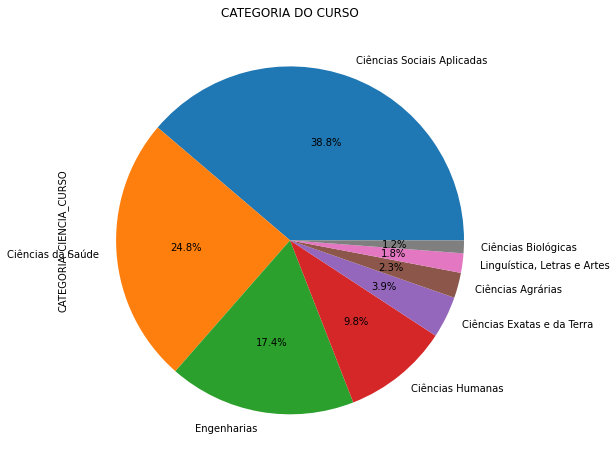

In [ ]:
plot = df3['CATEGORIA_CIENCIA_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%',figsize=(8, 8))
plot.set_title("CATEGORIA DO CURSO")

##Analisando os valores por tipo de escola de origem

In [ ]:
df3.ST_ENSINO_MEDIO_ESCOLA_PUBLICA.value_counts()

S    595421
N    137088
P     54247
Name: ST_ENSINO_MEDIO_ESCOLA_PUBLICA, dtype: int64

Text(0.5, 1.0, 'Origem ensino médio')

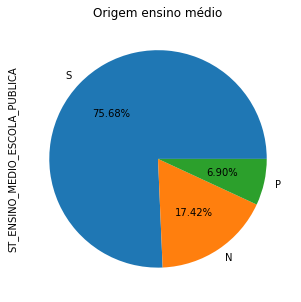

In [ ]:
#pd.set_option('display.float_format', '{:.2%}'.format)
#df3['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True)

plot = df3['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True).plot.pie(y='mass',autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Origem ensino médio")

##Analisando os valores por Sexo

In [ ]:
df3.DS_SEXO.value_counts()

Feminino     467104
Masculino    319652
Name: DS_SEXO, dtype: int64

Text(0.5, 1.0, 'Sexo dos alunos')

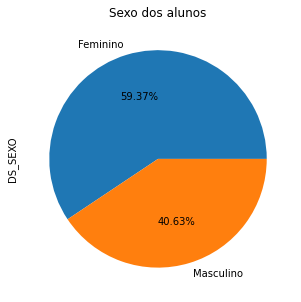

In [ ]:
plot = df3['DS_SEXO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Sexo dos alunos")

##Analisando os valores por Instituição de Ensino superior

In [ ]:
pd.set_option('display.max_rows', 1462)
df3.NO_IES.value_counts()

UNIVERSIDADE PAULISTA                             28768
UNIVERSIDADE ESTÁCIO DE SÁ                        20199
UNIVERSIDADE DE CUIABÁ                            12114
Centro Universitário Estácio do Ceará             11093
FACULDADES INTEGRADAS PAULISTA                    10711
                                                  ...  
FACULDADE LABORO                                      1
FACULDADE DO TRABALHO                                 1
FACULDADES INTEGRADAS URUBUPUNGÁ                      1
Faculdade Presidente Antônio Carlos de Itabira        1
FACULDADE DE ENFERMAGEM LUIZA DE MARILLAC             1
Name: NO_IES, Length: 1462, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por município da instituição

In [ ]:
pd.set_option('display.max_rows', 461)
df3.NO_MUNICIPIO.value_counts()

São Paulo          112796
Valinhos            86001
Belo Horizonte      67025
Rio de Janeiro      40718
Salvador            27190
                    ...  
Guaratuba               1
João Monlevade          1
Amambai                 1
Pereira Barreto         1
Paranaguá               1
Name: NO_MUNICIPIO, Length: 461, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por presença de deficiência

In [ ]:
df3.ST_DEFICIENCIA.value_counts()

N    782390
S      4366
Name: ST_DEFICIENCIA, dtype: int64

Text(0.5, 1.0, 'Presença de deficiência no aluno')

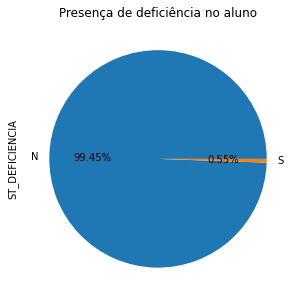

In [ ]:
plot = df3['ST_DEFICIENCIA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Presença de deficiência no aluno")

##Analisando os valores por raça do estudante

In [ ]:
df3.DS_RACA_COR.value_counts()

Branco     396041
Pardo      288321
Negro       83144
Amarelo     17568
Índio        1682
Name: DS_RACA_COR, dtype: int64

Text(0.5, 1.0, 'Distribuição racial dos estudantes')

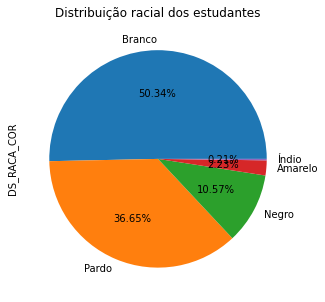

In [ ]:
plot = df3['DS_RACA_COR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição racial dos estudantes")

##Analise do agente financeiro

In [ ]:
df3.NO_AGENTE_FINANCEIRO.value_counts()

Caixa Econômica Federal    436676
Banco do Brasil            350080
Name: NO_AGENTE_FINANCEIRO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos agentes financeiros')

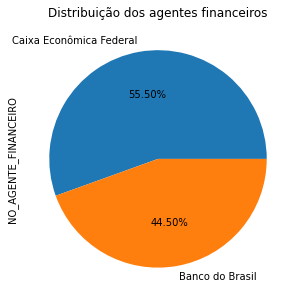

In [ ]:
plot = df3['NO_AGENTE_FINANCEIRO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos agentes financeiros")

##Analise dos estados cívies dos estudantes

In [ ]:
df3.DS_ESTADO_CIVIL.value_counts()

Solteiro         621108
Casado           116195
União estável     21760
Divorciado        18489
Separado           7743
Viúvo              1461
Name: DS_ESTADO_CIVIL, dtype: int64

Text(0.5, 1.0, 'Distribuição dos estados cívies dos estudantes')

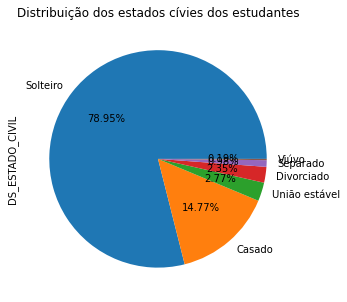

In [ ]:
plot = df3['DS_ESTADO_CIVIL'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos estados cívies dos estudantes")

##Analise da periocidade de pagamento do curso

In [ ]:
df3.DS_PERIODICIDADE_CUR.value_counts()

Semestral     758548
Anual          27706
Trimestral       502
Name: DS_PERIODICIDADE_CUR, dtype: int64

Text(0.5, 1.0, 'Distribuição da periocidade de pagamento do curso')

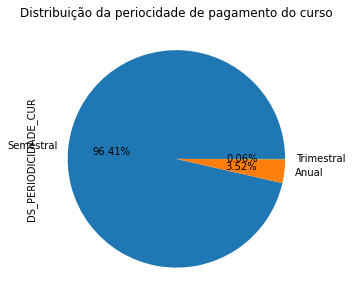

In [ ]:
plot = df3['DS_PERIODICIDADE_CUR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição da periocidade de pagamento do curso")

##Analise da temporalidade dos pagamentos

In [ ]:
df3.NU_ANO_PROC.value_counts()

2013    786756
Name: NU_ANO_PROC, dtype: int64

In [ ]:
df3ComLinhasDuplicads.NU_MES_PROC.value_counts()

5    1230187
4    1015985
7     951588
6     941745
3     526559
2     224549
Name: NU_MES_PROC, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

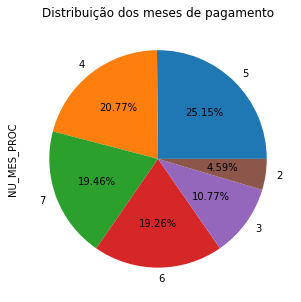

In [ ]:
plot = df3ComLinhasDuplicads['NU_MES_PROC'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

agora analisando a temporalidade do que vai pagar

In [ ]:
df3ComLinhasDuplicads.NU_MES.value_counts()

1     780718
2     780400
3     778912
4     776695
5     774365
6     774361
7      37527
8      37527
12     37527
10     37527
11     37527
9      37527
Name: NU_MES, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

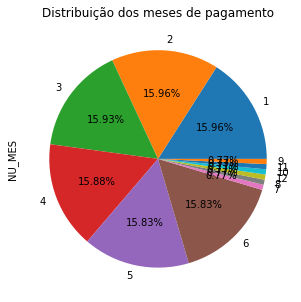

In [ ]:
plot = df3ComLinhasDuplicads['NU_MES'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

In [ ]:
df3.NU_SEMESTRE.value_counts()

1    755189
2     31567
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

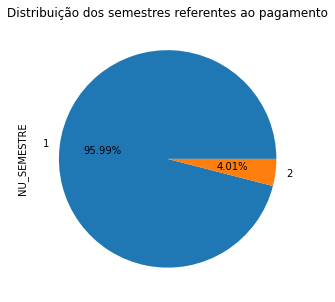

In [ ]:
plot = df3['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df3ComLinhasDuplicads.NU_SEMESTRE.value_counts()

1    4665451
2     225162
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

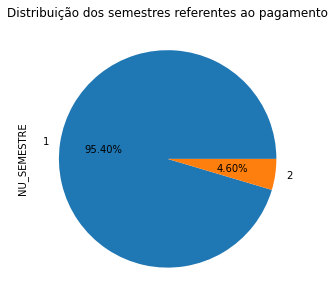

In [ ]:
plot = df3ComLinhasDuplicads['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df3ComLinhasDuplicads.NU_ANO.value_counts()

2013    4631173
2012     238950
2011      19362
2010        978
2009         78
2008         60
2007         12
Name: NU_ANO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos anos referentes ao pagamento')

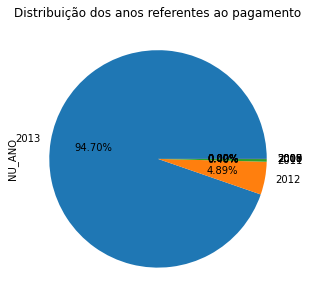

In [ ]:
plot = df3ComLinhasDuplicads['NU_ANO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos anos referentes ao pagamento")

##Analisando os tipos de financeamentos

In [ ]:
df3.TP_FIANCA.value_counts()

F    419969
N    354900
S     11887
Name: TP_FIANCA, dtype: int64

Text(0.5, 1.0, 'Distribuição do tipo de financeamento')

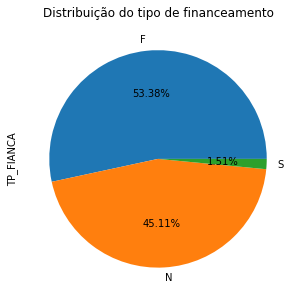

In [ ]:
plot = df3['TP_FIANCA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição do tipo de financeamento")

##Analise dos tipos de cursos

In [ ]:
df3.DS_TIPO_CURSO.value_counts()

Bacharelado     659041
Licenciatura     76316
Tecnológico      51398
Sequencial           1
Name: DS_TIPO_CURSO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos tipos de cursos')

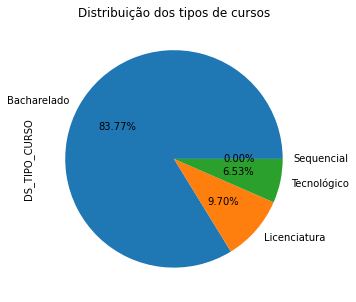

In [ ]:
plot = df3['DS_TIPO_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos tipos de cursos")

##Informações extras 

In [ ]:
df3.CO_PROCESSO.value_counts()

81    220891
80    181236
82    161575
79    144631
83     45442
84     32981
Name: CO_PROCESSO, dtype: int64

In [ ]:
df3.NU_ANO_EXERCICIO_INSC.value_counts()

2013.0    323289
2012.0    315708
2011.0    106925
2010.0     40810
2009.0        21
2007.0         2
2008.0         1
Name: NU_ANO_EXERCICIO_INSC, dtype: int64

In [ ]:
df3.NU_PERCENTUAL_PROUNI.value_counts()

0.0     765039
50.0     21701
25.0        16
Name: NU_PERCENTUAL_PROUNI, dtype: int64

In [ ]:
df3.NU_PERCENT_SOLICITADO_FINANC.value_counts()

100.0    602362
50.0      75783
75.0      60571
70.0      13503
80.0      10277
60.0      10092
90.0       4310
85.0       3439
65.0       3204
55.0       1610
95.0       1603
66.0          2
Name: NU_PERCENT_SOLICITADO_FINANC, dtype: int64

In [ ]:
df3.VL_REPASSE.value_counts()

6115.85     822
6041.15     609
13037.60    419
6115.80     414
12613.60    383
           ... 
25880.90      1
16198.30      1
47080.90      1
15877.58      1
13615.65      1
Name: VL_REPASSE, Length: 576328, dtype: int64

In [ ]:
df3.VL_PERC_FINANCIAMENTO.value_counts()

100.0    602362
50.0      75783
75.0      60571
70.0      13503
80.0      10277
60.0      10092
90.0       4310
85.0       3439
65.0       3204
55.0       1610
95.0       1603
66.0          2
Name: VL_PERC_FINANCIAMENTO, dtype: int64

In [ ]:
df3.QT_SEMESTRE_FINANCIADO.value_counts()

10.0    263379
8.0     197261
6.0      75466
7.0      61359
9.0      55278
4.0      50909
5.0      35897
3.0      15117
12.0     14296
2.0       9022
11.0      7015
1.0       1280
13.0       314
16.0        82
14.0        59
15.0        11
17.0         6
20.0         4
18.0         1
Name: QT_SEMESTRE_FINANCIADO, dtype: int64

##Analise do valor repassado

###Analise do valor repassado, utilizando a metrica VL_REPASSE

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df3.VL_REPASSE.sum()

26874609631.879993

In [ ]:
df3.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

SG_UF
SP   8694320432.170
MG   3627493870.380
RJ   1838981613.190
RS   1606157724.840
PR   1548816448.420
BA   1429748295.740
MT   1232324512.480
CE    954985508.680
SC    749729277.290
GO    670433675.640
DF    615595455.780
PB    570815949.040
PE    555736481.630
ES    421760824.940
RN    346385313.100
PI    316315322.760
PA    215557474.230
SE    214600514.700
AC    208751685.540
MA    202949410.540
RO    182733758.140
AP    164562618.510
MS    141356741.280
AM    125550019.540
AL    103667422.140
TO     86902386.540
RR     48376894.640
Name: VL_REPASSE, dtype: float64

In [ ]:
df3_vl_estados_interativo = df3.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df3_vl_estados_interativo.index,
               y=df3_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df3.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        14582556740.680
NORDESTE        4695204218.330
SUL             3904703450.550
CENTRO-OESTE    2659710385.180
NORTE           1032434837.140
Name: VL_REPASSE, dtype: float64

In [ ]:
df3_vl_regiao_interativo = df3.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df3_vl_regiao_interativo.index,
               y=df3_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df3.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             10244854239.920
Ciências Sociais Aplicadas     8008223580.800
Engenharias                    4677865508.980
Ciências Humanas               2028194840.100
Ciências Agrárias               830884001.160
Ciências Exatas e da Terra      586132718.620
Linguística, Letras e Artes     316395455.790
Ciências Biológicas             182059286.510
Name: VL_REPASSE, dtype: float64

In [ ]:
df3_vl_regiao_interativo = df3.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df3_vl_regiao_interativo.index,
               y=df3_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_SEMESTRE_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df3.VALOR_SEMESTRE_PAGO.sum()

3682070582.3699994

In [ ]:
df3.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

SG_UF
SP   1287745170.450
MG    472662376.920
RJ    257423561.970
PR    205872283.430
BA    192590071.380
RS    192553181.710
MT    173747935.070
CE    118514252.150
SC     94721554.270
GO     87158337.410
DF     85170282.220
PE     79880146.440
PB     71533272.650
ES     50637033.710
RN     46734016.310
PI     37611435.570
AC     29048218.270
MA     27919145.570
PA     27744979.450
SE     27162003.960
AP     23163621.990
RO     21819574.300
MS     21225065.180
AM     16984331.840
AL     13899594.690
TO     11684279.740
RR      6864855.720
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df3_vl_estados_interativo = df3.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df3_vl_estados_interativo.index,
               y=df3_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df3.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        2068468143.050
NORDESTE        615843938.720
SUL             493147019.410
CENTRO-OESTE    367301619.880
NORTE           137309861.310
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df3_vl_regiao_interativo = df3.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df3_vl_regiao_interativo.index,
               y=df3_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df3.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             1260660685.070
Ciências Sociais Aplicadas    1181056717.700
Engenharias                    637334453.410
Ciências Humanas               300352077.450
Ciências Agrárias              108713013.320
Ciências Exatas e da Terra     105637540.490
Linguística, Letras e Artes     57694493.000
Ciências Biológicas             30621601.930
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df3_vl_regiao_interativo = df3.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df3_vl_regiao_interativo.index,
               y=df3_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_ARQUIVO_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df3.VALOR_ARQUIVO_PAGO.sum()

3822478853.390001

In [ ]:
df3.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

SG_UF
SP   1327207275.450
MG    490120287.590
RJ    266498632.970
PR    212688136.440
RS    203717544.010
BA    200088130.480
MT    182430867.880
CE    126610336.810
SC     97881505.550
GO     91059252.670
DF     87186714.190
PE     82393297.130
PB     74884992.140
ES     52681361.450
RN     51581552.450
PI     39921987.210
AC     30138742.870
PA     28992801.070
MA     28445573.270
SE     27890196.980
AP     23593754.190
RO     22477787.680
MS     21588141.380
AM     17862529.820
AL     15467061.290
TO     12020047.660
RR      7050342.760
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df3_vl_estados_interativo = df3.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df3_vl_estados_interativo.index,
               y=df3_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df3.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        14582556740.680
NORDESTE        4695204218.330
SUL             3904703450.550
CENTRO-OESTE    2659710385.180
NORTE           1032434837.140
Name: VL_REPASSE, dtype: float64

In [ ]:
df3_vl_regiao_interativo = df3.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df3_vl_regiao_interativo.index,
               y=df3_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df3.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             1316321643.240
Ciências Sociais Aplicadas    1224339083.630
Engenharias                    658932491.750
Ciências Humanas               309944071.300
Ciências Agrárias              112755952.070
Ciências Exatas e da Terra     109012775.780
Linguística, Letras e Artes     59467336.690
Ciências Biológicas             31705498.930
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df3_vl_regiao_interativo = df3.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df3_vl_regiao_interativo.index,
               y=df3_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

#Analises de 2013.2

##Analisando os valores por estado.

In [ ]:
df12.SG_UF.value_counts()

SP    330285
MG    116923
RJ     65029
BA     55458
RS     44412
PR     42414
MT     39847
CE     30323
DF     26021
PE     24726
GO     22800
SC     21970
PB     19328
RN     14003
PI     11575
MA     10903
ES     10143
SE      8028
PA      7436
AM      7417
AC      6865
AP      5837
RO      5665
MS      5515
AL      5372
RR      3066
TO      2079
Name: SG_UF, dtype: int64

In [ ]:
df12_estados_interativo = df12.SG_UF.value_counts()

data_por_genero_interativo = [go.Bar(x=df12_estados_interativo.index,
               y=df12_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='quantidade de estudantes por estado',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por estado')

plt.show()

##Analisando os valores por região

In [ ]:
df12.REGIAO.value_counts()

SUDESTE         522380
NORDESTE        179716
SUL             108796
CENTRO-OESTE     94183
NORTE            38365
Name: REGIAO, dtype: int64

In [ ]:
df12_regiao_interativo = df12.REGIAO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df12_regiao_interativo.index,
               y=df12_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por região',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por região')

plt.show()

##Analisando os valores por curso

In [ ]:
pd.set_option('display.max_rows', 369)
df12.DS_CURSO.value_counts()

DIREITO                         151516
ADMINISTRAÇÃO                    78315
ENFERMAGEM                       68076
ENGENHARIA CIVIL                 66093
PEDAGOGIA                        44472
                                 ...  
RECURSOS HUMANOS                     1
LETRAS - FRANCÊS                     1
BIOPROCESSOS E BIOTECNOLOGIA         1
CONSERVAÇÃO E RESTAURO               1
QUÍMICA AMBIENTAL                    1
Name: DS_CURSO, Length: 369, dtype: int64

In [ ]:
pd.reset_option("^display")

In [ ]:
df12_curso_interativo = df12.DS_CURSO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_curso_interativo = [go.Bar(x=df12_curso_interativo.index,
               y=df12_curso_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por curso',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'curso'}                              
                                )

fig = go.Figure(data = data_por_curso_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por curso')

plt.show()

##Analisando os valores por categoria do curso

In [ ]:
df12.CATEGORIA_CIENCIA_CURSO.value_counts()

Ciências Sociais Aplicadas     369299
Ciências da Saúde              233119
Engenharias                    165716
Ciências Humanas                92573
Ciências Exatas e da Terra      34443
Ciências Agrárias               21872
Linguística, Letras e Artes     15324
Ciências Biológicas             11094
Name: CATEGORIA_CIENCIA_CURSO, dtype: int64

Text(0.5, 1.0, 'CATEGORIA DO CURSO')

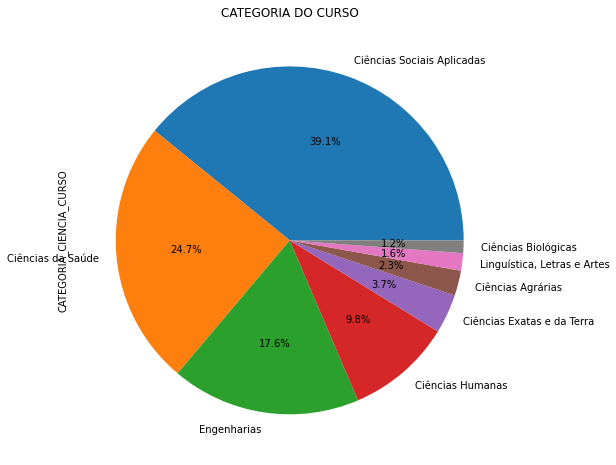

In [ ]:
plot = df12['CATEGORIA_CIENCIA_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%',figsize=(8, 8))
plot.set_title("CATEGORIA DO CURSO")

##Analisando os valores por tipo de escola de origem

In [ ]:
df12.ST_ENSINO_MEDIO_ESCOLA_PUBLICA.value_counts()

S    709394
N    168823
P     65223
Name: ST_ENSINO_MEDIO_ESCOLA_PUBLICA, dtype: int64

Text(0.5, 1.0, 'Origem ensino médio')

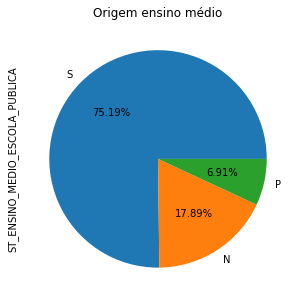

In [ ]:
plot = df12['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True).plot.pie(y='mass',autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Origem ensino médio")

##Analisando os valores por Sexo

In [ ]:
df12.DS_SEXO.value_counts()

Feminino     560168
Masculino    383272
Name: DS_SEXO, dtype: int64

Text(0.5, 1.0, 'Sexo dos alunos')

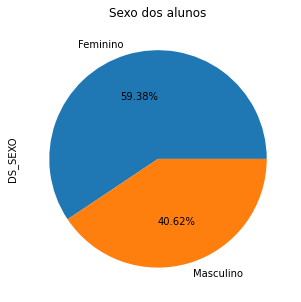

In [ ]:
plot = df12['DS_SEXO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Sexo dos alunos")

##Analisando os valores por Instituição de Ensino superior

In [ ]:
pd.set_option('display.max_rows', 1529)
df12.NO_IES.value_counts()

UNIVERSIDADE PAULISTA                      38868
UNIVERSIDADE ESTÁCIO DE SÁ                 27096
Centro Universitário Estácio do Ceará      13836
UNIVERSIDADE DE CUIABÁ                     13640
CENTRO UNIVERSITÁRIO UNA                    9826
                                           ...  
FACULDADE RAIMUNDO MARINHO                     1
FACULDADE ESCOLA PAULISTA DE DIREITO           1
INSTITUTO SUPERIOR DO LITORAL DO PARANÁ        1
FACULDADE CENECISTA DE SENHOR DO BONFIM        1
FACULDADE DO PLANALTO                          1
Name: NO_IES, Length: 1529, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por município da instituição

In [ ]:
pd.set_option('display.max_rows', 474)
df12.NO_MUNICIPIO.value_counts()

São Paulo         133820
Valinhos          108342
Belo Horizonte     79891
Rio de Janeiro     50237
Salvador           35574
                   ...  
Amambai                1
Diamantino             1
Guaratuba              1
Penedo                 1
João Monlevade         1
Name: NO_MUNICIPIO, Length: 474, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por presença de deficiência

In [ ]:
df12.ST_DEFICIENCIA.value_counts()

N    937956
S      5484
Name: ST_DEFICIENCIA, dtype: int64

Text(0.5, 1.0, 'Presença de deficiência no aluno')

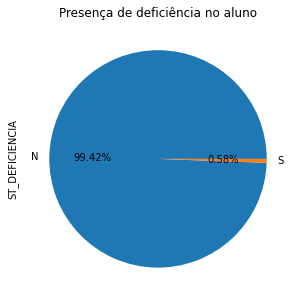

In [ ]:
plot = df12['ST_DEFICIENCIA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Presença de deficiência no aluno")

##Analisando os valores por raça do estudante

In [ ]:
df12.DS_RACA_COR.value_counts()

Branco     464384
Pardo      354173
Negro      101349
Amarelo     21440
Índio        2094
Name: DS_RACA_COR, dtype: int64

Text(0.5, 1.0, 'Distribuição racial dos estudantes')

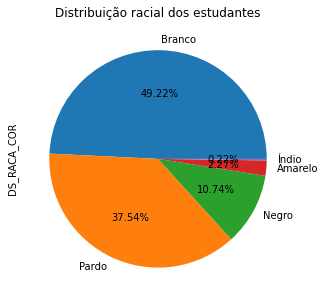

In [ ]:
plot = df12['DS_RACA_COR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição racial dos estudantes")

##Analise do agente financeiro

In [ ]:
df12.NO_AGENTE_FINANCEIRO.value_counts()

Caixa Econômica Federal    523862
Banco do Brasil            419578
Name: NO_AGENTE_FINANCEIRO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos agentes financeiros')

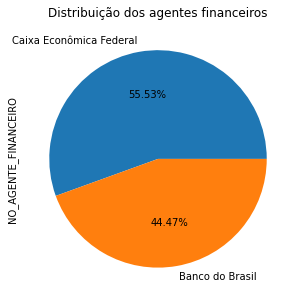

In [ ]:
plot = df12['NO_AGENTE_FINANCEIRO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos agentes financeiros")

##Analise dos estados cívies dos estudantes

In [ ]:
df12.DS_ESTADO_CIVIL.value_counts()

Solteiro         742165
Casado           141031
União estável     26299
Divorciado        23229
Separado           9017
Viúvo              1699
Name: DS_ESTADO_CIVIL, dtype: int64

Text(0.5, 1.0, 'Distribuição dos estados cívies dos estudantes')

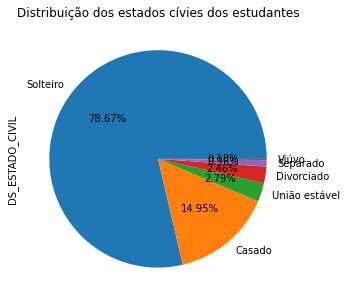

In [ ]:
plot = df12['DS_ESTADO_CIVIL'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos estados cívies dos estudantes")

##Analise da periocidade de pagamento do curso

In [ ]:
df12.DS_PERIODICIDADE_CUR.value_counts()

Semestral     912849
Anual          29979
Trimestral       612
Name: DS_PERIODICIDADE_CUR, dtype: int64

Text(0.5, 1.0, 'Distribuição da periocidade de pagamento do curso')

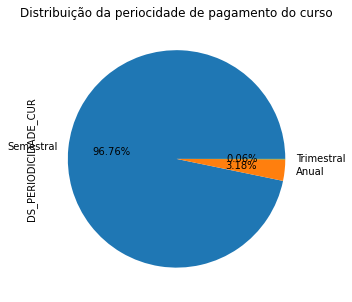

In [ ]:
plot = df12['DS_PERIODICIDADE_CUR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição da periocidade de pagamento do curso")




























##Analise da temporalidade dos pagamentos

In [ ]:
df12.NU_ANO_PROC.value_counts()

2013    903868
2014     39572
Name: NU_ANO_PROC, dtype: int64

In [ ]:
df12ComLinhasDuplicads.NU_MES_PROC.value_counts()

11    1173363
1     1160123
10    1141604
12    1116805
9      955149
8      341744
Name: NU_MES_PROC, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

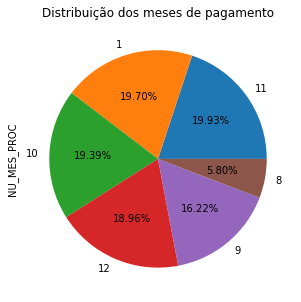

In [ ]:
plot = df12ComLinhasDuplicads['NU_MES_PROC'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

agora analisando a temporalidade do que vai pagar

In [ ]:
df12ComLinhasDuplicads.NU_MES.value_counts()

7     937701
8     937330
9     936279
10    934470
11    931327
12    931315
5      47896
6      47241
4      47209
3      46320
2      45878
1      45822
Name: NU_MES, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

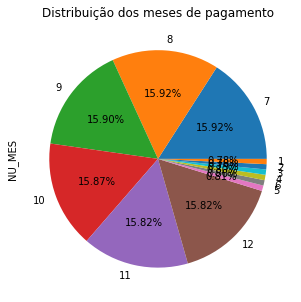

In [ ]:
plot = df12ComLinhasDuplicads['NU_MES'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

In [ ]:
df12.NU_SEMESTRE.value_counts()

2    903874
1     39566
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

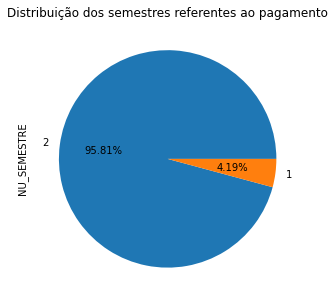

In [ ]:
plot = df12['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df12ComLinhasDuplicads.NU_SEMESTRE.value_counts()

2    5608422
1     280366
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

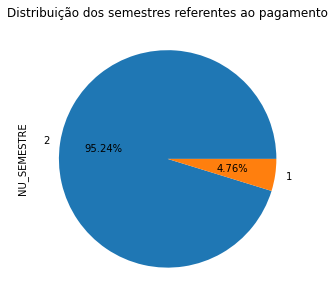

In [ ]:
plot = df12ComLinhasDuplicads['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df12ComLinhasDuplicads.NU_ANO.value_counts()

2013    5791012
2012      79482
2011      17256
2010       1038
Name: NU_ANO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos anos referentes ao pagamento')

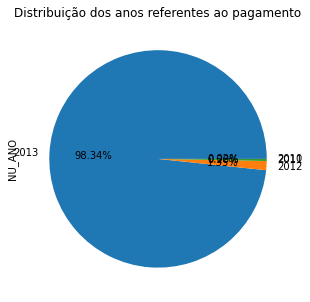

In [ ]:
plot = df12ComLinhasDuplicads['NU_ANO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos anos referentes ao pagamento")

##Analisando os tipos de financeamentos

In [ ]:
df12.TP_FIANCA.value_counts()

F    525965
N    405301
S     12174
Name: TP_FIANCA, dtype: int64

Text(0.5, 1.0, 'Distribuição do tipo de financeamento')

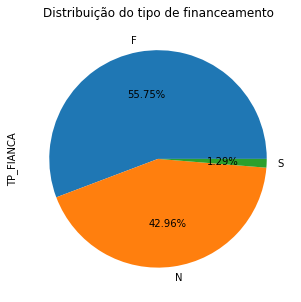

In [ ]:
plot = df12['TP_FIANCA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição do tipo de financeamento")

##Analise dos tipos de cursos

In [ ]:
df12.DS_TIPO_CURSO.value_counts()

Bacharelado     795101
Licenciatura     86534
Tecnológico      61805
Name: DS_TIPO_CURSO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos tipos de cursos')

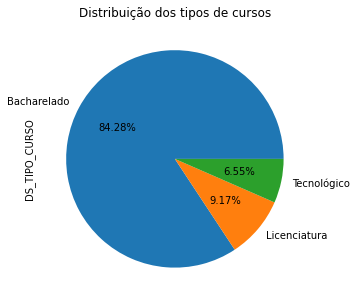

In [ ]:
plot = df12['DS_TIPO_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos tipos de cursos")

##Informações extras 

In [ ]:
df12.CO_PROCESSO.value_counts()

86    359303
85    206688
87    187386
88     94736
91     51768
92     39572
89      3104
90       883
Name: CO_PROCESSO, dtype: int64

In [ ]:
df12.NU_ANO_EXERCICIO_INSC.value_counts()

2013.0    517533
2012.0    286907
2011.0     96599
2010.0     36122
2009.0      5643
2008.0       482
2007.0       149
2005.0         3
2014.0         1
2015.0         1
Name: NU_ANO_EXERCICIO_INSC, dtype: int64

In [ ]:
df12.NU_PERCENTUAL_PROUNI.value_counts()

0.0     918385
50.0     25040
25.0        15
Name: NU_PERCENTUAL_PROUNI, dtype: int64

In [ ]:
df12.NU_PERCENT_SOLICITADO_FINANC.value_counts()

100.0    731101
50.0      86132
75.0      75215
70.0      13987
80.0      11107
60.0      10428
90.0       4758
85.0       3761
65.0       3370
95.0       1926
55.0       1650
30.0          2
25.0          2
40.0          1
Name: NU_PERCENT_SOLICITADO_FINANC, dtype: int64

In [ ]:
df12.VL_REPASSE.value_counts()

13037.60     404
12613.60     368
44233.49     328
31866.38     307
25224.58     264
            ... 
38127.36       1
52148.94       1
66159.45       1
30231.21       1
198713.23      1
Name: VL_REPASSE, Length: 689961, dtype: int64

In [ ]:
df12.VL_PERC_FINANCIAMENTO.value_counts()

100.0    731101
50.0      86132
75.0      75215
70.0      13987
80.0      11107
60.0      10428
90.0       4758
85.0       3761
65.0       3370
95.0       1926
55.0       1650
30.0          2
25.0          2
40.0          1
Name: VL_PERC_FINANCIAMENTO, dtype: int64

In [ ]:
df12.QT_SEMESTRE_FINANCIADO.value_counts()

10.0    315141
8.0     224831
6.0      83298
7.0      75978
9.0      73091
4.0      58317
5.0      47259
3.0      20627
12.0     19063
11.0     11709
2.0      10710
1.0       2336
13.0       858
14.0        91
16.0        78
15.0        39
18.0         6
17.0         5
20.0         2
25.0         1
Name: QT_SEMESTRE_FINANCIADO, dtype: int64

##Analise do valor repassado

###Analise do valor repassado, utilizando a metrica VL_REPASSE

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df12.VL_REPASSE.sum()

32306103744.41002

In [ ]:
df12.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

SG_UF
SP   10142423800.000
MG    4381294839.520
RJ    2252296029.190
RS    1995823469.090
BA    1787641601.460
PR    1661324195.990
MT    1476639134.370
CE    1174182455.720
SC     880565365.010
DF     827542083.440
GO     812537650.800
PB     760640840.140
PE     682545849.850
ES     496071038.070
RN     434002739.870
PI     406213570.970
MA     280206776.390
PA     262682650.350
SE     260429657.580
RO     249020275.010
AC     242084371.830
AP     212384832.580
AM     196729647.620
MS     144518710.500
AL     127400929.380
TO      92051769.780
RR      66849459.900
Name: VL_REPASSE, dtype: float64

In [ ]:
df12_vl_estados_interativo = df12.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df12_vl_estados_interativo.index,
               y=df12_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df12.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        17272085706.780
NORDESTE        5913264421.360
SUL             4537713030.090
CENTRO-OESTE    3261237579.110
NORTE           1321803007.070
Name: VL_REPASSE, dtype: float64

In [ ]:
df12_vl_regiao_interativo = df12.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df12_vl_regiao_interativo.index,
               y=df12_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df12.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             12312329759.200
Ciências Sociais Aplicadas     9705506567.290
Engenharias                    5645182684.560
Ciências Humanas               2423261327.650
Ciências Agrárias               987128806.530
Ciências Exatas e da Terra      668870677.770
Linguística, Letras e Artes     344546251.630
Ciências Biológicas             219277669.780
Name: VL_REPASSE, dtype: float64

In [ ]:
df12_vl_regiao_interativo = df12.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df12_vl_regiao_interativo.index,
               y=df12_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_SEMESTRE_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df12.VALOR_SEMESTRE_PAGO.sum()

4493317119.789999

In [ ]:
df12.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

SG_UF
SP   1515513499.010
MG    581509528.260
RJ    322184294.930
BA    246014780.270
RS    242666128.980
PR    221151702.440
MT    212921960.100
CE    151420386.170
DF    116797170.520
SC    112229267.100
GO    109444720.930
PE     98024915.000
PB     97694020.950
RN     59795469.330
ES     58848835.220
PI     51038742.620
MA     39863953.460
PA     34563855.900
AC     33226854.450
SE     32988739.770
AP     32759899.500
RO     31777810.430
AM     30015648.680
MS     21428191.450
AL     17452878.280
TO     11959330.410
RR     10024535.630
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df12_vl_estados_interativo = df12.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df12_vl_estados_interativo.index,
               y=df12_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df12.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        2478056157.420
NORDESTE        794293885.850
SUL             576047098.520
CENTRO-OESTE    460592043.000
NORTE           184327935.000
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df12_vl_regiao_interativo = df12.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df12_vl_regiao_interativo.index,
               y=df12_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df12.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             1551186457.560
Ciências Sociais Aplicadas    1452077040.800
Engenharias                    781105726.670
Ciências Humanas               361187775.910
Ciências Agrárias              130457791.810
Ciências Exatas e da Terra     118591209.500
Linguística, Letras e Artes     62085059.300
Ciências Biológicas             36626058.240
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df12_vl_regiao_interativo = df12.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df12_vl_regiao_interativo.index,
               y=df12_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_ARQUIVO_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df12.VALOR_ARQUIVO_PAGO.sum()

4664729160.65

In [ ]:
df12.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

SG_UF
SP   1572693720.880
MG    605089937.090
RJ    332461982.620
RS    255631495.460
BA    253976685.930
PR    230056263.010
MT    218492186.170
CE    159141091.660
DF    121393738.310
SC    116809711.570
GO    113893188.380
PE    100889612.190
PB    100484101.600
RN     63457958.350
ES     61074697.980
PI     52457065.260
MA     40522798.810
PA     36227823.770
SE     33999396.710
AC     33889173.440
AP     33447588.000
RO     32908647.200
AM     31852409.910
MS     22407914.330
AL     18650325.440
TO     12185217.150
RR     10634429.430
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df12_vl_estados_interativo = df12.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df12_vl_estados_interativo.index,
               y=df12_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df12.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        2571320338.570
NORDESTE        823579035.950
SUL             602497470.040
CENTRO-OESTE    476187027.190
NORTE           191145288.900
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df12_vl_regiao_interativo = df12.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df12_vl_regiao_interativo.index,
               y=df12_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df12.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             1608143825.470
Ciências Sociais Aplicadas    1508797350.180
Engenharias                    810964001.570
Ciências Humanas               375598458.330
Ciências Agrárias              135635830.450
Ciências Exatas e da Terra     122996546.670
Linguística, Letras e Artes     64523737.130
Ciências Biológicas             38069410.850
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df12_vl_regiao_interativo = df12.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df12_vl_regiao_interativo.index,
               y=df12_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")